# Enhanced Report Display - Individual Models vs Ensemble

This notebook displays comprehensive results comparing individual feature-based models with ensemble performance.

In [ ]:
import json
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import os
import glob
from scipy.stats import ttest_rel
from modules.PostgresDBHandler import PostgresDBHandler

FEATURE_TYPES = [
    'mel_spectrogram', 'mfcc', 'chromagram', 'spectral_contrast',
    'tonnetz', 'constant_q', 'stft', 'harmonic_percussive', 'onset_strength'
]

dbParams = {
    "dbname": "mydatabase",
    "user": "myuser",
    "password": "mypassword",
    "host": "postgres_server",
    "port": "5432",
}

In [2]:
db = PostgresDBHandler(**dbParams)
db.connect()
instrument_df = db.get_mappings_instruments()
db.close()

class_names = [name for _, name in sorted(zip(instrument_df['instrumentid'], instrument_df['name']))]
print("Class names:", class_names)

Class names: ['violin', 'cello', 'clarinet', 'trumpet', 'piccolo', 'flute', 'sax', 'bass', 'oboe']


In [3]:
# Find and load the latest ensemble results
ensemble_results_files = sorted(glob.glob("ensemble_results/ensemble_results_*.json"), reverse=True)
if not ensemble_results_files:
    raise FileNotFoundError("No ensemble results file found in ensemble_results/ directory.")
ENSEMBLE_RESULTS_PATH = ensemble_results_files[0]

with open(ENSEMBLE_RESULTS_PATH, "r") as file:
    ensemble_results = json.load(file)

print(f"Loaded ensemble results from: {ENSEMBLE_RESULTS_PATH}")

Loaded ensemble results from: ensemble_results/ensemble_results_2025_07_10.json


In [4]:
# Load individual model results for all feature types
individual_results = {}
for feature_type in FEATURE_TYPES:
    results_path = f"models/{feature_type}/results.json"
    if os.path.exists(results_path):
        with open(results_path, "r") as f:
            individual_results[feature_type] = json.load(f)
    else:
        print(f"Results not found for {feature_type}")

In [5]:
# Display ensemble accuracy statistics
accs = ensemble_results['accuracy_list']
print("Ensemble Accuracies (per fold):", accs)
print(f"Mean Ensemble Accuracy: {np.mean(accs):.4f}")
print(f"Std Ensemble Accuracy: {np.std(accs):.4f}")
print(f"Min Ensemble Accuracy: {np.min(accs):.4f}")
print(f"Max Ensemble Accuracy: {np.max(accs):.4f}")

Ensemble Accuracies (per fold): [0.9670138888888888, 0.9745222929936306, 0.9675738274464389, 0.9664157498552403, 0.9577301679212508]
Mean Ensemble Accuracy: 0.9667
Std Ensemble Accuracy: 0.0053
Min Ensemble Accuracy: 0.9577
Max Ensemble Accuracy: 0.9745


In [6]:
# Display ensemble classification reports for each fold
for i, report in enumerate(ensemble_results['classification_reports']):
    df = pd.DataFrame(report).transpose()
    df.index = [class_names[int(idx)] if idx.isdigit() and int(idx) < len(class_names) else idx for idx in df.index]
    display(df)

precision    recall  f1-score      support
violin         0.981043  0.995192  0.988067   208.000000
cello          0.973684  0.973684  0.973684   190.000000
clarinet       0.923077  0.928177  0.925620   181.000000
trumpet        0.978836  0.953608  0.966057   194.000000
piccolo        0.969697  0.989691  0.979592   194.000000
flute          0.972477  0.981481  0.976959   216.000000
sax            0.948113  0.948113  0.948113   212.000000
bass           0.992481  0.963504  0.977778   137.000000
oboe           0.969231  0.964286  0.966752   196.000000
accuracy       0.967014  0.967014  0.967014     0.967014
macro avg      0.967627  0.966415  0.966958  1728.000000
weighted avg   0.967097  0.967014  0.966998  1728.000000

precision    recall  f1-score      support
violin         0.990000  0.994975  0.992481   199.000000
cello          0.975962  0.985437  0.980676   206.000000
clarinet       0.918782  0.962766  0.940260   188.000000
trumpet        0.985366  0.980583  0.982968   206.000000
piccolo        0.980769  0.976077  0.978417   209.000000
flute          0.975248  0.985000  0.980100   200.000000
sax            0.973118  0.957672  0.965333   189.000000
bass           0.991379  0.974576  0.982906   118.000000
oboe           0.985366  0.952830  0.968825   212.000000
accuracy       0.974522  0.974522  0.974522     0.974522
macro avg      0.975110  0.974435  0.974663  1727.000000
weighted avg   0.974872  0.974522  0.974588  1727.000000

precision    recall  f1-score      support
violin         1.000000  0.974619  0.987147   197.000000
cello          0.986111  0.977064  0.981567   218.000000
clarinet       0.940299  0.926471  0.933333   204.000000
trumpet        0.963731  0.948980  0.956298   196.000000
piccolo        0.949239  0.984211  0.966408   190.000000
flute          0.966825  0.971429  0.969121   210.000000
sax            0.950739  0.984694  0.967419   196.000000
bass           1.000000  0.967213  0.983333   122.000000
oboe           0.964286  0.974227  0.969231   194.000000
accuracy       0.967574  0.967574  0.967574     0.967574
macro avg      0.969025  0.967656  0.968206  1727.000000
weighted avg   0.967857  0.967574  0.967590  1727.000000

precision    recall  f1-score      support
violin         0.994898  0.979899  0.987342   199.000000
cello          0.994565  0.958115  0.976000   191.000000
clarinet       0.953846  0.898551  0.925373   207.000000
trumpet        0.970732  0.980296  0.975490   203.000000
piccolo        0.957143  0.985294  0.971014   204.000000
flute          0.933333  0.989130  0.960422   184.000000
sax            0.960976  0.970443  0.965686   203.000000
bass           1.000000  1.000000  1.000000   129.000000
oboe           0.947115  0.951691  0.949398   207.000000
accuracy       0.966416  0.966416  0.966416     0.966416
macro avg      0.968068  0.968158  0.967858  1727.000000
weighted avg   0.966747  0.966416  0.966322  1727.000000

precision    recall  f1-score     support
violin         0.979899  0.989848  0.984848   197.00000
cello          0.978723  0.943590  0.960836   195.00000
clarinet       0.927273  0.927273  0.927273   220.00000
trumpet        0.984293  0.935323  0.959184   201.00000
piccolo        0.941748  0.955665  0.948655   203.00000
flute          0.958974  0.984211  0.971429   190.00000
sax            0.944724  0.940000  0.942356   200.00000
bass           0.992308  0.992308  0.992308   130.00000
oboe           0.929648  0.968586  0.948718   191.00000
accuracy       0.957730  0.957730  0.957730     0.95773
macro avg      0.959732  0.959645  0.959512  1727.00000
weighted avg   0.958090  0.957730  0.957729  1727.00000

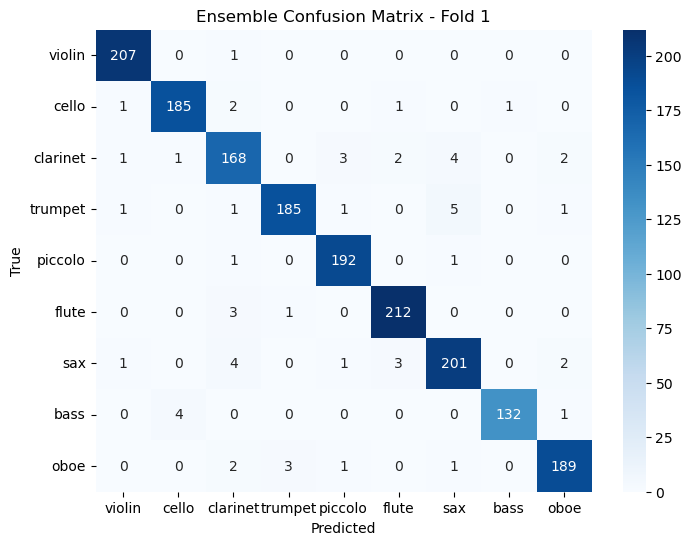

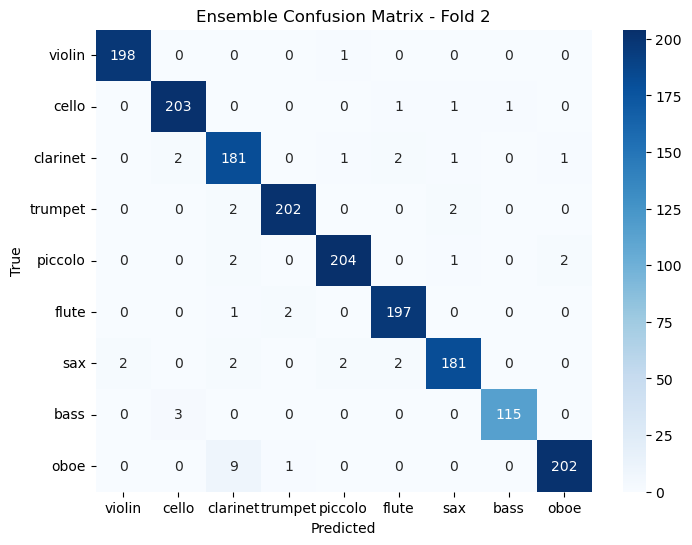

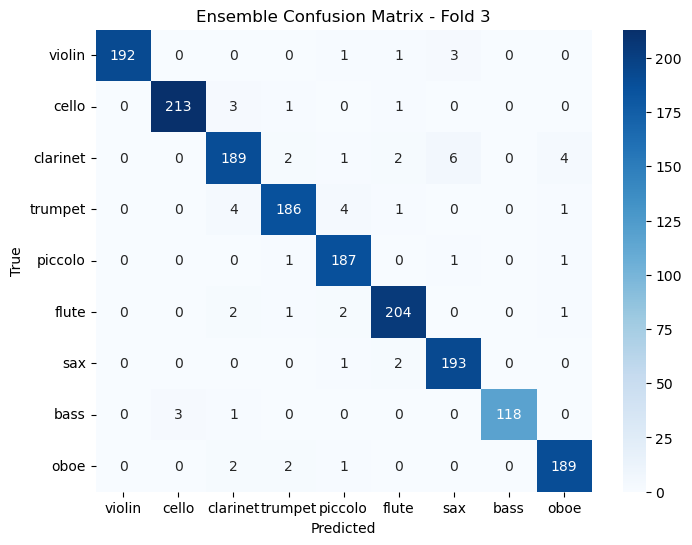

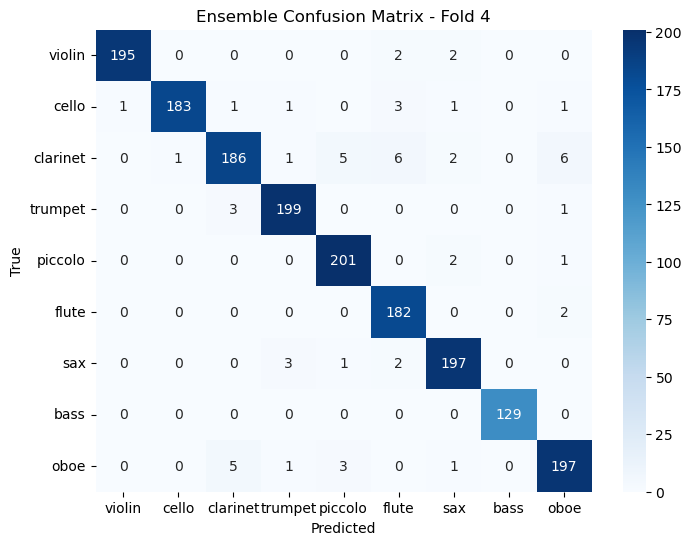

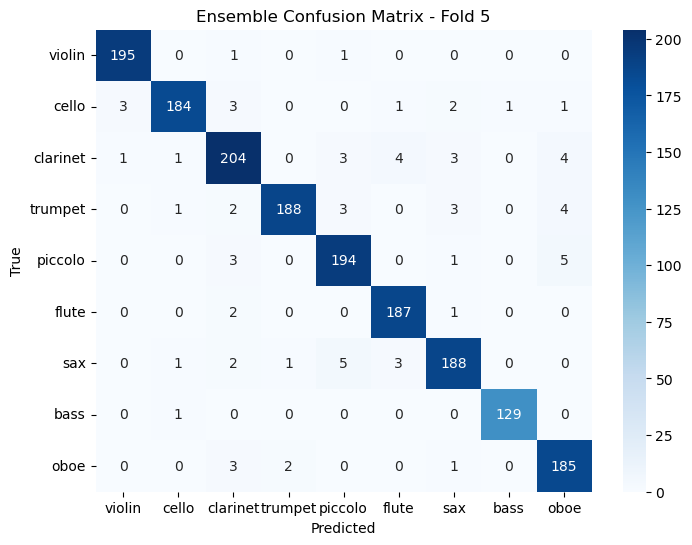

In [7]:
# Display ensemble confusion matrices for each fold
for i, conf_matrix in enumerate(ensemble_results['confusion_matrices']):
    plt.figure(figsize=(8, 6))
    sns.heatmap(np.array(conf_matrix), annot=True, fmt="d", cmap="Blues",
                xticklabels=class_names, yticklabels=class_names)
    plt.title(f"Ensemble Confusion Matrix - Fold {i+1}")
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.show()

In [8]:
# Create a summary DataFrame for individual models
performance_data = []
for feature_type, results in individual_results.items():
    accuracies = results['accuracy_list']
    losses = results['loss_list']
    performance_data.append({
        'Feature Type': feature_type.replace('_', ' ').title(),
        'Mean Accuracy': np.mean(accuracies),
        'Std Accuracy': np.std(accuracies),
        'Min Accuracy': np.min(accuracies),
        'Max Accuracy': np.max(accuracies),
        'Mean Loss': np.mean(losses),
        'Std Loss': np.std(losses)
    })

performance_df = pd.DataFrame(performance_data)
performance_df = performance_df.sort_values('Mean Accuracy', ascending=False)
display(performance_df.round(4))

Feature Type  Mean Accuracy  Std Accuracy  Min Accuracy  \
0      Mel Spectrogram         0.9370        0.0048        0.9294   
8  Harmonic Percussive         0.9143        0.0316        0.8541   
6                  Cqt         0.9136        0.0208        0.8738   
5           Constant Q         0.9025        0.0207        0.8622   
7                 Stft         0.8240        0.0109        0.8056   
1                 Mfcc         0.8161        0.0236        0.7904   
4              Tonnetz         0.4867        0.0160        0.4684   
2           Chromagram         0.4691        0.0137        0.4534   
3    Spectral Contrast         0.4614        0.0094        0.4447   
9       Onset Strength         0.3067        0.0108        0.2899   

   Max Accuracy  Mean Loss  Std Loss  
0        0.9433     0.4403    0.1130  
8        0.9409     9.7068    2.3404  
6        0.9340     0.7561    0.1617  
5        0.9218     0.7231    0.2199  
7        0.8367     2.2849    0.5249  
1        0.8594     0.5600    0.0711  
4        0.5087     1.5393    0.0260  
2        0.4948     1.6135    0.0817  
3        0.4722     1.5532    0.0318  
9        0.3185     1.8980    0.0302


Mel Spectrogram Model
Accuracies: [0.9409722089767456, 0.9363057613372803, 0.9432541728019714, 0.9351476430892944, 0.9293572902679443]
Mean: 0.9370, Std: 0.0048, Min: 0.9294, Max: 0.9433


precision    recall  f1-score      support
violin         0.956311  0.947115  0.951691   208.000000
cello          0.967391  0.936842  0.951872   190.000000
clarinet       0.813472  0.867403  0.839572   181.000000
trumpet        0.968085  0.938144  0.952880   194.000000
piccolo        0.958549  0.953608  0.956072   194.000000
flute          0.958333  0.958333  0.958333   216.000000
sax            0.930556  0.948113  0.939252   212.000000
bass           0.970588  0.963504  0.967033   137.000000
oboe           0.954082  0.954082  0.954082   196.000000
accuracy       0.940972  0.940972  0.940972     0.940972
macro avg      0.941930  0.940794  0.941199  1728.000000
weighted avg   0.942113  0.940972  0.941384  1728.000000

precision    recall  f1-score      support
violin         0.950980  0.974874  0.962779   199.000000
cello          0.950739  0.936893  0.943765   206.000000
clarinet       0.877005  0.872340  0.874667   188.000000
trumpet        0.919431  0.941748  0.930456   206.000000
piccolo        0.942857  0.947368  0.945107   209.000000
flute          0.984293  0.940000  0.961637   200.000000
sax            0.927083  0.941799  0.934383   189.000000
bass           0.982609  0.957627  0.969957   118.000000
oboe           0.911215  0.919811  0.915493   212.000000
accuracy       0.936306  0.936306  0.936306     0.936306
macro avg      0.938468  0.936940  0.937583  1727.000000
weighted avg   0.936675  0.936306  0.936371  1727.000000

precision    recall  f1-score      support
violin         0.984536  0.969543  0.976982   197.000000
cello          0.941964  0.967890  0.954751   218.000000
clarinet       0.925134  0.848039  0.884910   204.000000
trumpet        0.971751  0.877551  0.922252   196.000000
piccolo        0.944162  0.978947  0.961240   190.000000
flute          0.940092  0.971429  0.955504   210.000000
sax            0.964103  0.959184  0.961637   196.000000
bass           0.974790  0.950820  0.962656   122.000000
oboe           0.866359  0.969072  0.914842   194.000000
accuracy       0.943254  0.943254  0.943254     0.943254
macro avg      0.945877  0.943608  0.943864  1727.000000
weighted avg   0.944566  0.943254  0.943011  1727.000000

precision    recall  f1-score      support
violin         0.973404  0.919598  0.945736   199.000000
cello          0.937173  0.937173  0.937173   191.000000
clarinet       0.893048  0.806763  0.847716   207.000000
trumpet        0.920188  0.965517  0.942308   203.000000
piccolo        0.961165  0.970588  0.965854   204.000000
flute          0.895522  0.978261  0.935065   184.000000
sax            0.959391  0.931034  0.945000   203.000000
bass           0.984615  0.992248  0.988417   129.000000
oboe           0.911215  0.942029  0.926366   207.000000
accuracy       0.935148  0.935148  0.935148     0.935148
macro avg      0.937302  0.938135  0.937070  1727.000000
weighted avg   0.935503  0.935148  0.934656  1727.000000

precision    recall  f1-score      support
violin         0.944162  0.944162  0.944162   197.000000
cello          0.970760  0.851282  0.907104   195.000000
clarinet       0.836134  0.904545  0.868996   220.000000
trumpet        0.959391  0.940299  0.949749   201.000000
piccolo        0.933333  0.965517  0.949153   203.000000
flute          0.959184  0.989474  0.974093   190.000000
sax            0.924623  0.920000  0.922306   200.000000
bass           0.940299  0.969231  0.954545   130.000000
oboe           0.924324  0.895288  0.909574   191.000000
accuracy       0.929357  0.929357  0.929357     0.929357
macro avg      0.932468  0.931089  0.931076  1727.000000
weighted avg   0.930809  0.929357  0.929357  1727.000000

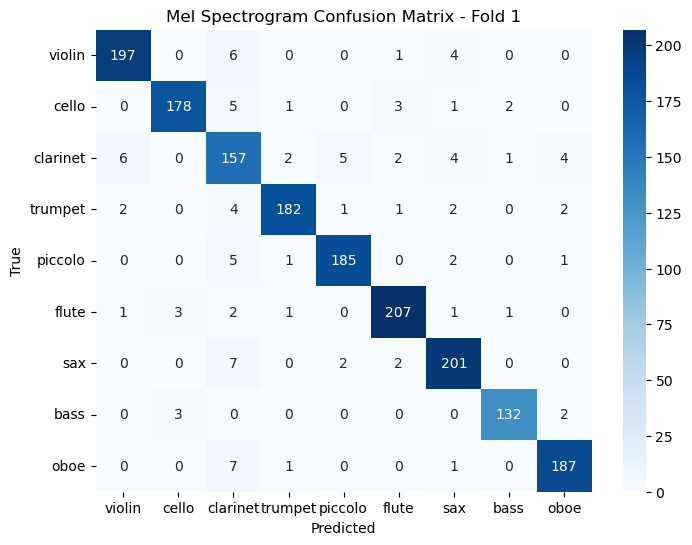

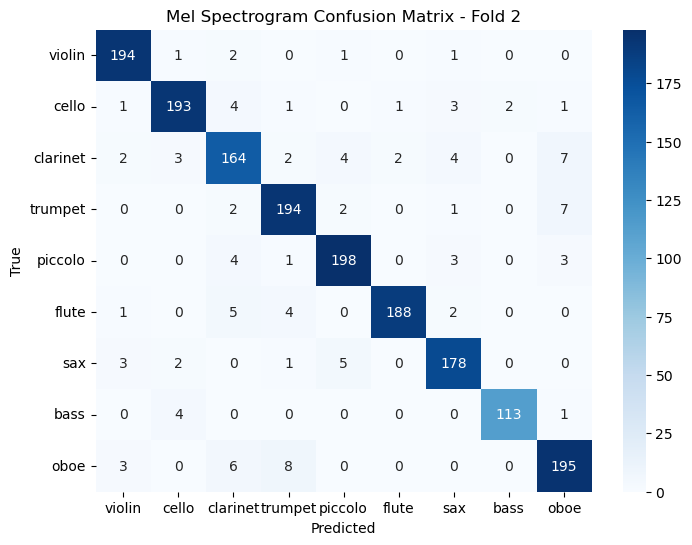

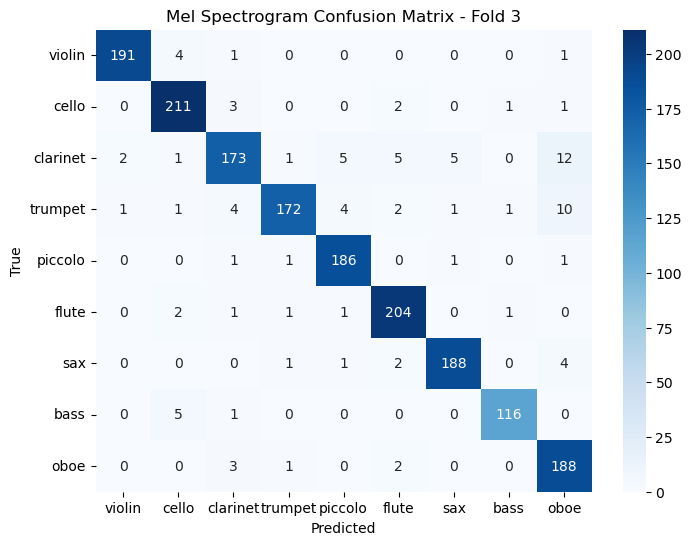

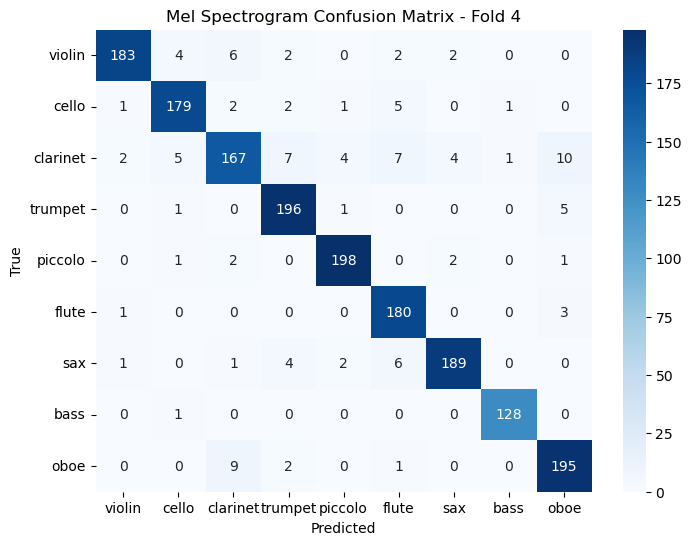

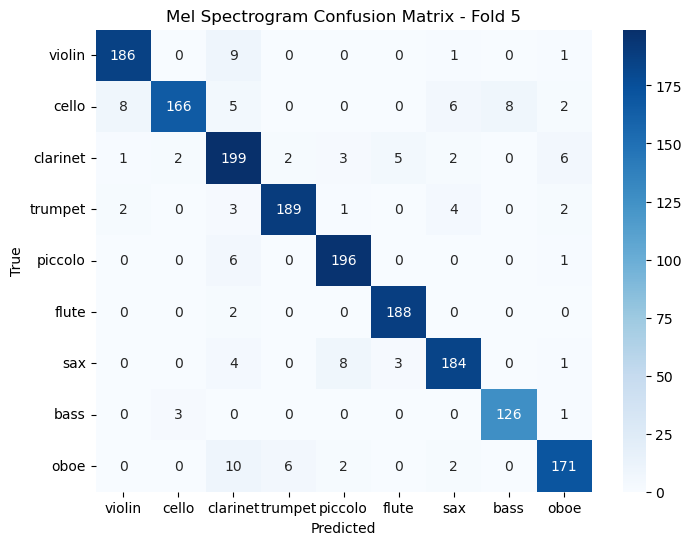


Mfcc Model
Accuracies: [0.859375, 0.8147075772285461, 0.8158656358718872, 0.8002316355705261, 0.7903879284858704]
Mean: 0.8161, Std: 0.0236, Min: 0.7904, Max: 0.8594


precision    recall  f1-score      support
violin         0.886598  0.826923  0.855721   208.000000
cello          0.900000  0.852632  0.875676   190.000000
clarinet       0.679070  0.806630  0.737374   181.000000
trumpet        0.953020  0.731959  0.827988   194.000000
piccolo        0.902439  0.953608  0.927318   194.000000
flute          0.832636  0.921296  0.874725   216.000000
sax            0.806306  0.844340  0.824885   212.000000
bass           1.000000  0.846715  0.916996   137.000000
oboe           0.884615  0.938776  0.910891   196.000000
accuracy       0.859375  0.859375  0.859375     0.859375
macro avg      0.871632  0.858098  0.861286  1728.000000
weighted avg   0.867740  0.859375  0.860152  1728.000000

precision    recall  f1-score      support
violin         0.779817  0.854271  0.815348   199.000000
cello          0.807692  0.917476  0.859091   206.000000
clarinet       0.618357  0.680851  0.648101   188.000000
trumpet        0.876344  0.791262  0.831633   206.000000
piccolo        0.951515  0.751196  0.839572   209.000000
flute          0.797980  0.790000  0.793970   200.000000
sax            0.765550  0.846561  0.804020   189.000000
bass           0.972727  0.906780  0.938596   118.000000
oboe           0.875000  0.825472  0.849515   212.000000
accuracy       0.814708  0.814708  0.814708     0.814708
macro avg      0.827220  0.818208  0.819983  1727.000000
weighted avg   0.823266  0.814708  0.816133  1727.000000

precision    recall  f1-score      support
violin         0.900000  0.776650  0.833787   197.000000
cello          0.897436  0.802752  0.847458   218.000000
clarinet       0.691919  0.671569  0.681592   204.000000
trumpet        0.770732  0.806122  0.788030   196.000000
piccolo        0.827751  0.910526  0.867168   190.000000
flute          0.750000  0.900000  0.818182   210.000000
sax            0.775000  0.790816  0.782828   196.000000
bass           0.955357  0.877049  0.914530   122.000000
oboe           0.870968  0.835052  0.852632   194.000000
accuracy       0.815866  0.815866  0.815866     0.815866
macro avg      0.826574  0.818948  0.820690  1727.000000
weighted avg   0.820701  0.815866  0.816154  1727.000000

precision    recall  f1-score      support
violin         0.782178  0.793970  0.788030   199.000000
cello          0.889610  0.717277  0.794203   191.000000
clarinet       0.622951  0.734300  0.674058   207.000000
trumpet        0.870056  0.758621  0.810526   203.000000
piccolo        0.905759  0.848039  0.875949   204.000000
flute          0.833333  0.842391  0.837838   184.000000
sax            0.730233  0.773399  0.751196   203.000000
bass           0.801282  0.968992  0.877193   129.000000
oboe           0.846535  0.826087  0.836186   207.000000
accuracy       0.800232  0.800232  0.800232     0.800232
macro avg      0.809104  0.807008  0.805020  1727.000000
weighted avg   0.808387  0.800232  0.801491  1727.000000

precision    recall  f1-score      support
violin         0.915033  0.710660  0.800000   197.000000
cello          0.825397  0.800000  0.812500   195.000000
clarinet       0.745223  0.531818  0.620690   220.000000
trumpet        0.793814  0.766169  0.779747   201.000000
piccolo        0.757937  0.940887  0.839560   203.000000
flute          0.795000  0.836842  0.815385   190.000000
sax            0.710280  0.760000  0.734300   200.000000
bass           0.959350  0.907692  0.932806   130.000000
oboe           0.726531  0.931937  0.816514   191.000000
accuracy       0.790388  0.790388  0.790388     0.790388
macro avg      0.803174  0.798445  0.794611  1727.000000
weighted avg   0.796277  0.790388  0.786770  1727.000000

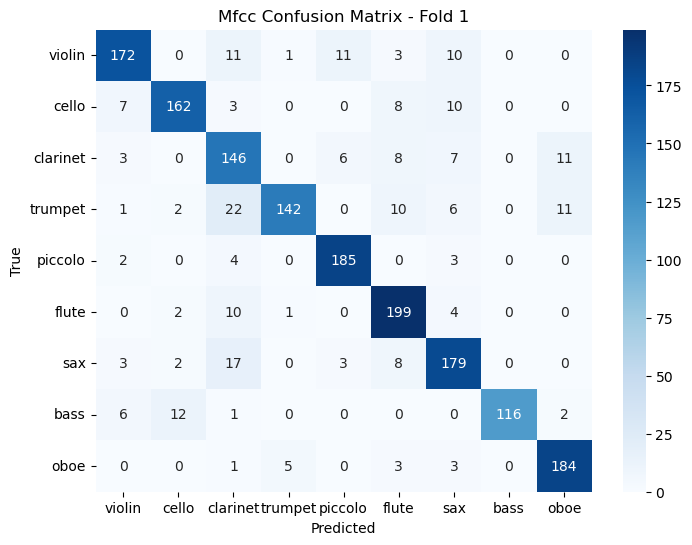

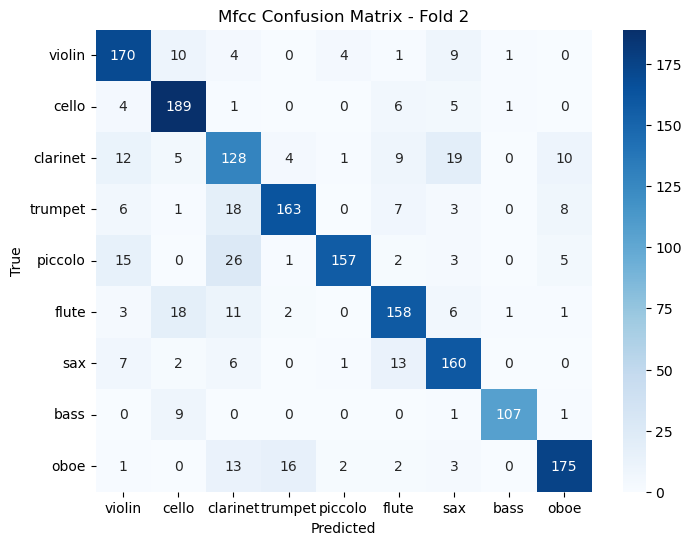

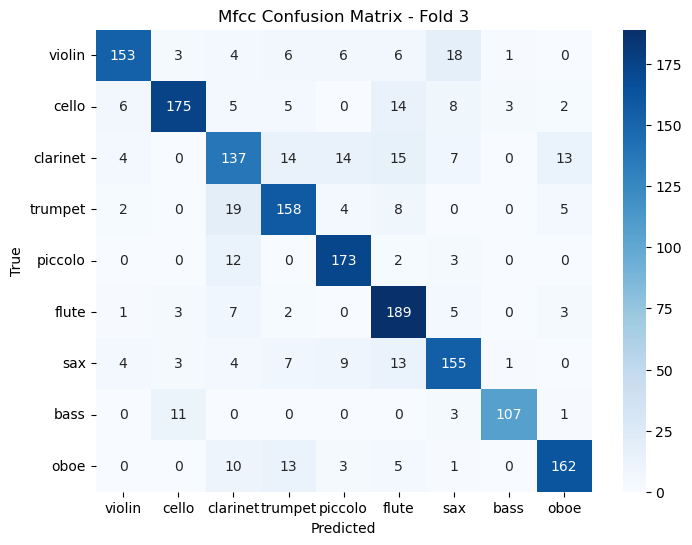

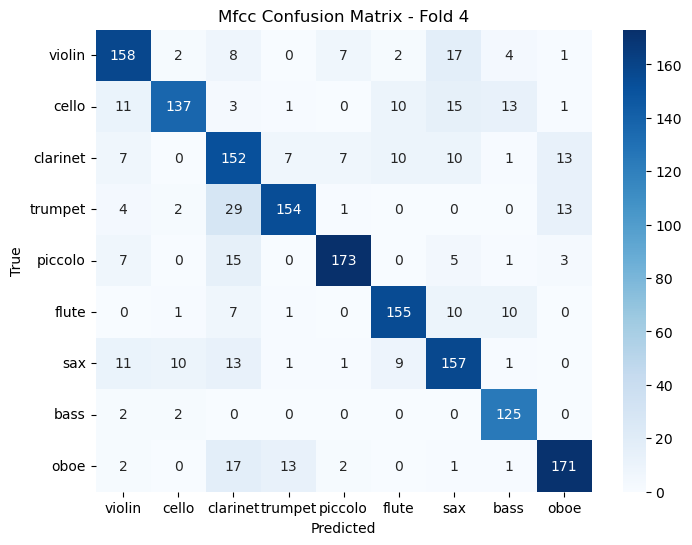

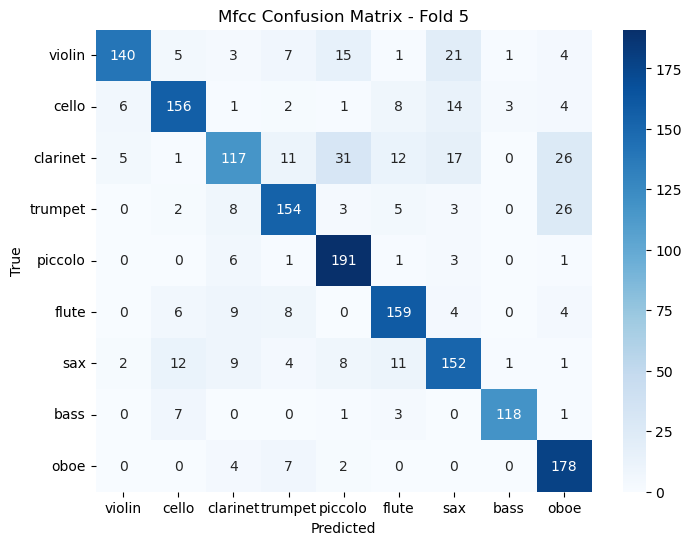


Chromagram Model
Accuracies: [0.4947916567325592, 0.46496814489364624, 0.46554720401763916, 0.4667052626609802, 0.45338737964630127]
Mean: 0.4691, Std: 0.0137, Min: 0.4534, Max: 0.4948


precision    recall  f1-score      support
violin         0.524590  0.307692  0.387879   208.000000
cello          0.414530  0.510526  0.457547   190.000000
clarinet       0.299674  0.508287  0.377049   181.000000
trumpet        0.628272  0.618557  0.623377   194.000000
piccolo        0.464730  0.577320  0.514943   194.000000
flute          0.563158  0.495370  0.527094   216.000000
sax            0.470930  0.382075  0.421875   212.000000
bass           0.723810  0.554745  0.628099   137.000000
oboe           0.638554  0.540816  0.585635   196.000000
accuracy       0.494792  0.494792  0.494792     0.494792
macro avg      0.525361  0.499488  0.502611  1728.000000
weighted avg   0.520808  0.494792  0.498158  1728.000000

precision    recall  f1-score      support
violin         0.417266  0.291457  0.343195   199.000000
cello          0.361823  0.616505  0.456014   206.000000
clarinet       0.358621  0.276596  0.312312   188.000000
trumpet        0.619632  0.490291  0.547425   206.000000
piccolo        0.576087  0.507177  0.539440   209.000000
flute          0.508065  0.630000  0.562500   200.000000
sax            0.315175  0.428571  0.363229   189.000000
bass           0.635514  0.576271  0.604444   118.000000
oboe           0.631579  0.396226  0.486957   212.000000
accuracy       0.464968  0.464968  0.464968     0.464968
macro avg      0.491529  0.468122  0.468391  1727.000000
weighted avg   0.488191  0.464968  0.464488  1727.000000

precision    recall  f1-score      support
violin         0.427536  0.299492  0.352239   197.000000
cello          0.383929  0.591743  0.465704   218.000000
clarinet       0.349693  0.279412  0.310627   204.000000
trumpet        0.668919  0.505102  0.575581   196.000000
piccolo        0.380952  0.673684  0.486692   190.000000
flute          0.611511  0.404762  0.487106   210.000000
sax            0.432000  0.275510  0.336449   196.000000
bass           0.640000  0.655738  0.647773   122.000000
oboe           0.520737  0.582474  0.549878   194.000000
accuracy       0.465547  0.465547  0.465547     0.465547
macro avg      0.490586  0.474213  0.468005  1727.000000
weighted avg   0.483463  0.465547  0.459472  1727.000000

precision    recall  f1-score      support
violin         0.471545  0.291457  0.360248   199.000000
cello          0.413408  0.387435  0.400000   191.000000
clarinet       0.409357  0.338164  0.370370   207.000000
trumpet        0.482036  0.793103  0.599628   203.000000
piccolo        0.691176  0.230392  0.345588   204.000000
flute          0.564103  0.478261  0.517647   184.000000
sax            0.305687  0.635468  0.412800   203.000000
bass           0.560510  0.682171  0.615385   129.000000
oboe           0.777778  0.439614  0.561728   207.000000
accuracy       0.466705  0.466705  0.466705     0.466705
macro avg      0.519511  0.475118  0.464822  1727.000000
weighted avg   0.518554  0.466705  0.458418  1727.000000

precision    recall  f1-score      support
violin         0.356481  0.390863  0.372881   197.000000
cello          0.441860  0.292308  0.351852   195.000000
clarinet       0.427746  0.336364  0.376590   220.000000
trumpet        0.440514  0.681592  0.535156   201.000000
piccolo        0.470833  0.556650  0.510158   203.000000
flute          0.544218  0.421053  0.474777   190.000000
sax            0.385542  0.320000  0.349727   200.000000
bass           0.692308  0.484615  0.570136   130.000000
oboe           0.464567  0.617801  0.530337   191.000000
accuracy       0.453387  0.453387  0.453387     0.453387
macro avg      0.469341  0.455694  0.452402  1727.000000
weighted avg   0.459675  0.453387  0.446793  1727.000000

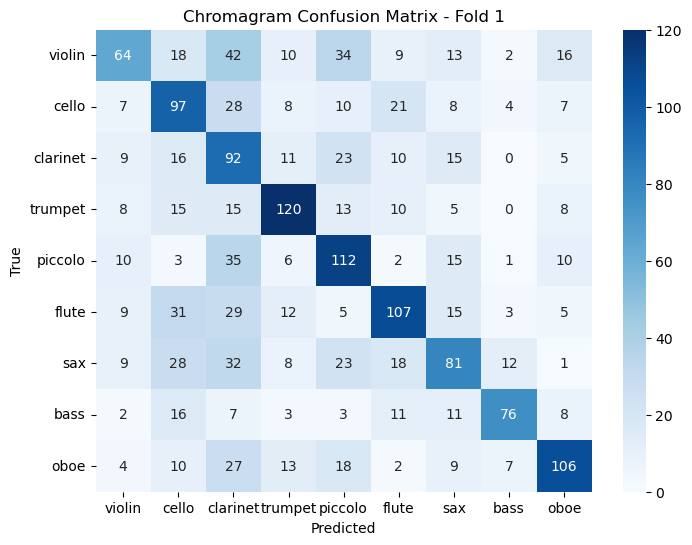

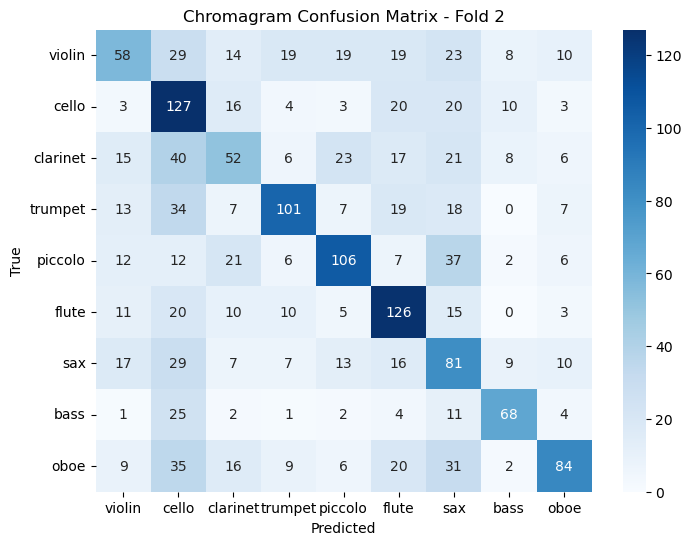

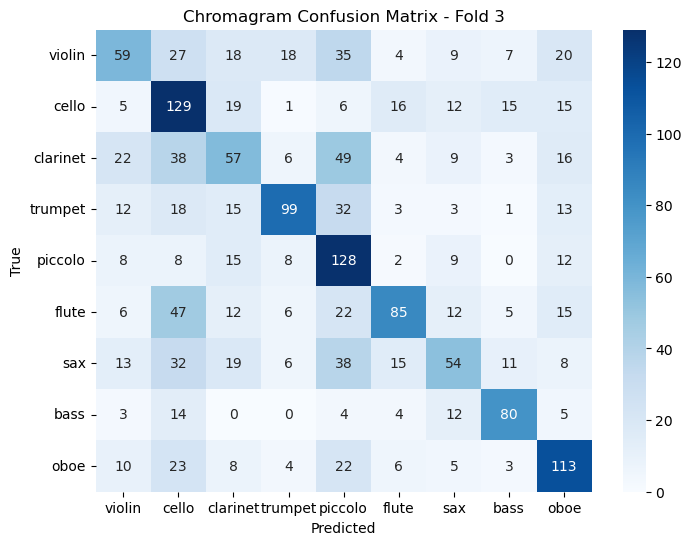

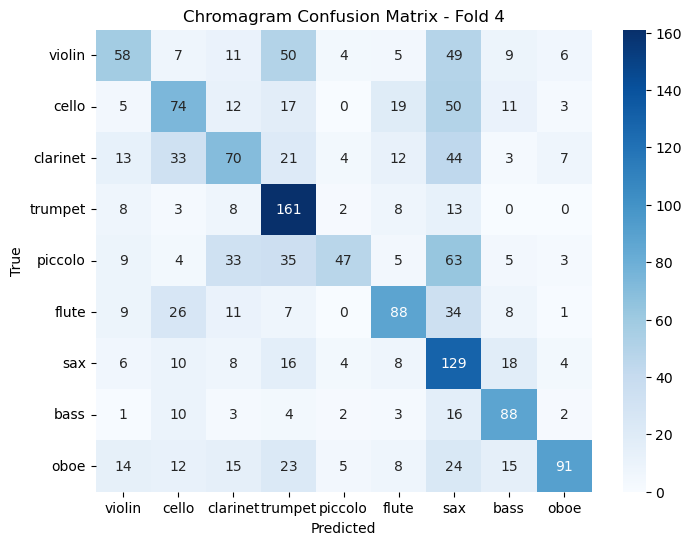

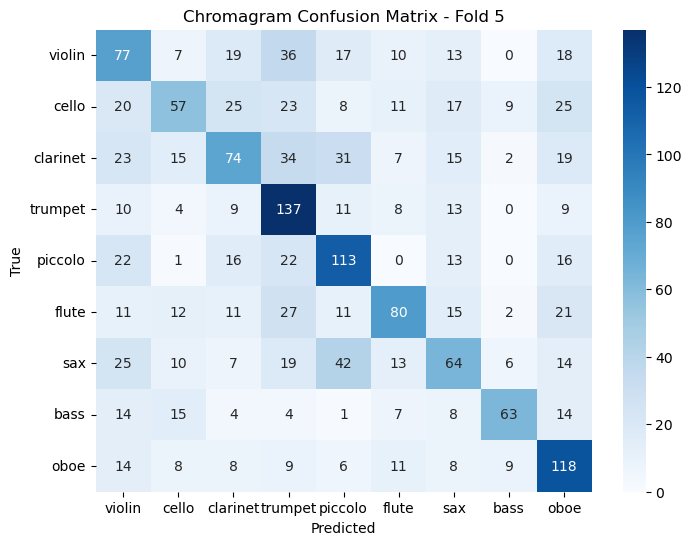


Spectral Contrast Model
Accuracies: [0.4722222089767456, 0.44470179080963135, 0.4638100862503052, 0.45917776226997375, 0.46728432178497314]
Mean: 0.4614, Std: 0.0094, Min: 0.4447, Max: 0.4722


precision    recall  f1-score      support
violin         0.434783  0.288462  0.346821   208.000000
cello          0.392523  0.442105  0.415842   190.000000
clarinet       0.419580  0.331492  0.370370   181.000000
trumpet        0.459184  0.463918  0.461538   194.000000
piccolo        0.408964  0.752577  0.529946   194.000000
flute          0.636872  0.527778  0.577215   216.000000
sax            0.473430  0.462264  0.467780   212.000000
bass           0.664062  0.620438  0.641509   137.000000
oboe           0.475904  0.403061  0.436464   196.000000
accuracy       0.472222  0.472222  0.472222     0.472222
macro avg      0.485033  0.476899  0.471943  1728.000000
weighted avg   0.481229  0.472222  0.467486  1728.000000

precision    recall  f1-score      support
violin         0.313433  0.316583  0.315000   199.000000
cello          0.544000  0.330097  0.410876   206.000000
clarinet       0.379310  0.409574  0.393862   188.000000
trumpet        0.496855  0.383495  0.432877   206.000000
piccolo        0.525822  0.535885  0.530806   209.000000
flute          0.546448  0.500000  0.522193   200.000000
sax            0.379121  0.365079  0.371968   189.000000
bass           0.663934  0.686441  0.675000   118.000000
oboe           0.351032  0.561321  0.431942   212.000000
accuracy       0.444702  0.444702  0.444702     0.444702
macro avg      0.466662  0.454275  0.453836  1727.000000
weighted avg   0.458427  0.444702  0.444380  1727.000000

precision    recall  f1-score     support
violin         0.491525  0.147208  0.226562   197.00000
cello          0.364458  0.555046  0.440000   218.00000
clarinet       0.486239  0.259804  0.338658   204.00000
trumpet        0.372832  0.658163  0.476015   196.00000
piccolo        0.453947  0.726316  0.558704   190.00000
flute          0.760417  0.347619  0.477124   210.00000
sax            0.436893  0.459184  0.447761   196.00000
bass           0.563218  0.803279  0.662162   122.00000
oboe           0.693069  0.360825  0.474576   194.00000
accuracy       0.463810  0.463810  0.463810     0.46381
macro avg      0.513622  0.479716  0.455729  1727.00000
weighted avg   0.511457  0.463810  0.445802  1727.00000

precision    recall  f1-score      support
violin         0.356863  0.457286  0.400881   199.000000
cello          0.378277  0.528796  0.441048   191.000000
clarinet       0.376963  0.347826  0.361809   207.000000
trumpet        0.462617  0.487685  0.474820   203.000000
piccolo        0.534759  0.490196  0.511509   204.000000
flute          0.404930  0.625000  0.491453   184.000000
sax            0.594595  0.216749  0.317690   203.000000
bass           0.847059  0.558140  0.672897   129.000000
oboe           0.582353  0.478261  0.525199   207.000000
accuracy       0.459178  0.459178  0.459178     0.459178
macro avg      0.504268  0.465549  0.466367  1727.000000
weighted avg   0.491794  0.459178  0.457490  1727.000000

precision    recall  f1-score      support
violin         0.349693  0.289340  0.316667   197.000000
cello          0.371622  0.564103  0.448065   195.000000
clarinet       0.393939  0.354545  0.373206   220.000000
trumpet        0.572464  0.393035  0.466077   201.000000
piccolo        0.528889  0.586207  0.556075   203.000000
flute          0.661871  0.484211  0.559271   190.000000
sax            0.539130  0.310000  0.393651   200.000000
bass           0.838384  0.638462  0.724891   130.000000
oboe           0.358757  0.664921  0.466055   191.000000
accuracy       0.467284  0.467284  0.467284     0.467284
macro avg      0.512750  0.476091  0.478217  1727.000000
weighted avg   0.498869  0.467284  0.467093  1727.000000

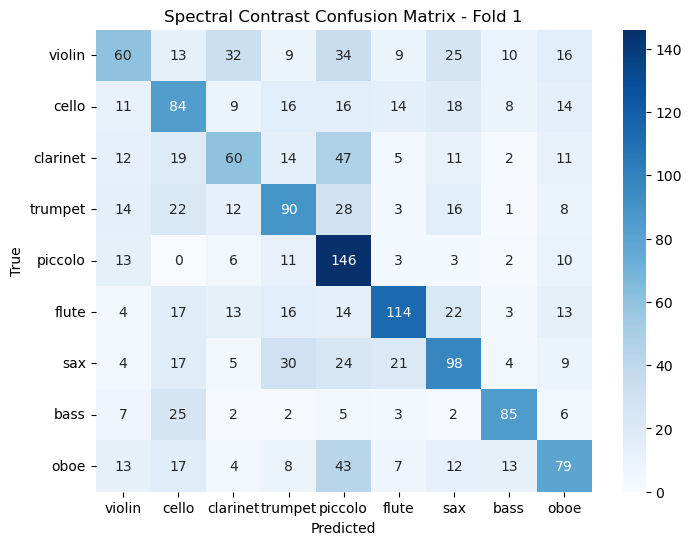

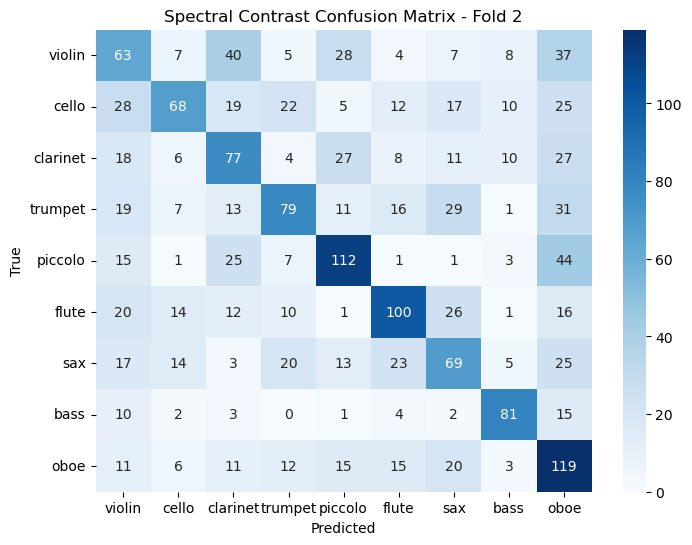

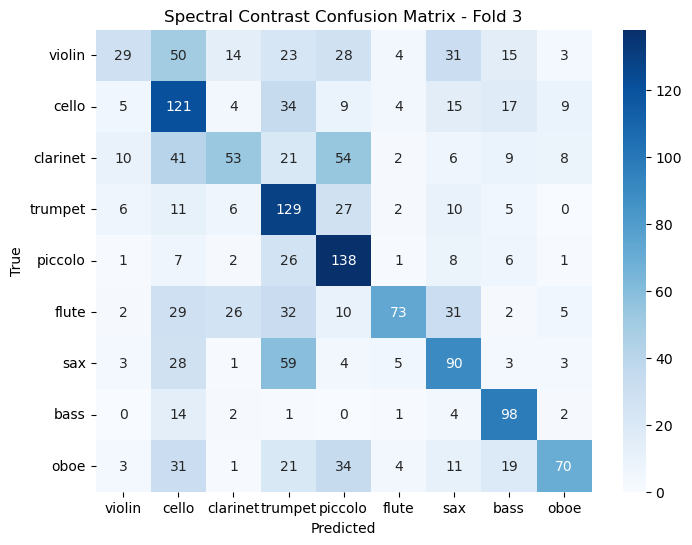

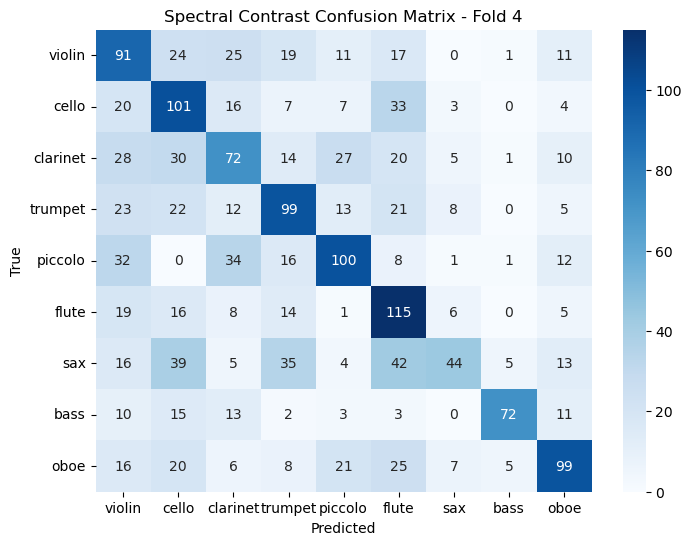

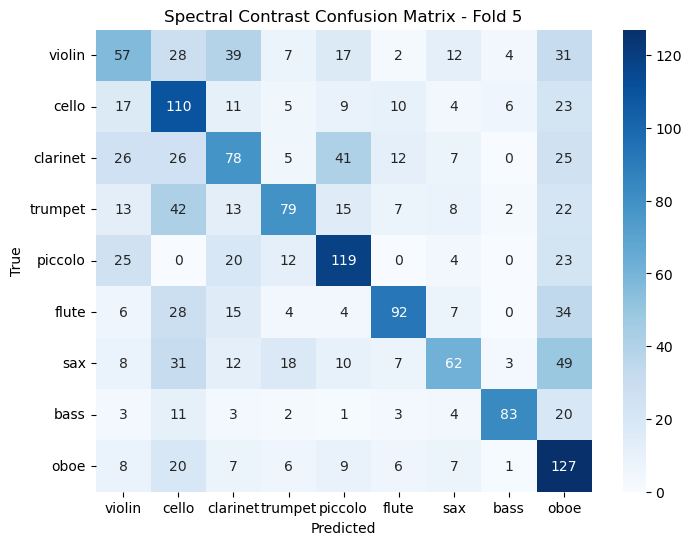


Tonnetz Model
Accuracies: [0.5086805820465088, 0.47133758664131165, 0.5014476180076599, 0.4684423804283142, 0.48349738121032715]
Mean: 0.4867, Std: 0.0160, Min: 0.4684, Max: 0.5087


precision    recall  f1-score      support
violin         0.515789  0.235577  0.323432   208.000000
cello          0.431624  0.531579  0.476415   190.000000
clarinet       0.506494  0.430939  0.465672   181.000000
trumpet        0.585492  0.582474  0.583979   194.000000
piccolo        0.349254  0.603093  0.442344   194.000000
flute          0.807882  0.759259  0.782816   216.000000
sax            0.391667  0.221698  0.283133   212.000000
bass           0.680328  0.605839  0.640927   137.000000
oboe           0.466912  0.647959  0.542735   196.000000
accuracy       0.508681  0.508681  0.508681     0.508681
macro avg      0.526160  0.513158  0.504606  1728.000000
weighted avg   0.523475  0.508681  0.500279  1728.000000

precision    recall  f1-score      support
violin         0.503937  0.321608  0.392638   199.000000
cello          0.335211  0.577670  0.424242   206.000000
clarinet       0.500000  0.526596  0.512953   188.000000
trumpet        0.573171  0.456311  0.508108   206.000000
piccolo        0.496000  0.296651  0.371257   209.000000
flute          0.561837  0.795000  0.658385   200.000000
sax            0.273333  0.216931  0.241888   189.000000
bass           0.469512  0.652542  0.546099   118.000000
oboe           0.614907  0.466981  0.530831   212.000000
accuracy       0.471338  0.471338  0.471338     0.471338
macro avg      0.480879  0.478921  0.465156  1727.000000
weighted avg   0.483419  0.471338  0.462419  1727.000000

precision    recall  f1-score      support
violin         0.516854  0.233503  0.321678   197.000000
cello          0.461783  0.665138  0.545113   218.000000
clarinet       0.597222  0.421569  0.494253   204.000000
trumpet        0.541237  0.535714  0.538462   196.000000
piccolo        0.452941  0.405263  0.427778   190.000000
flute          0.709677  0.733333  0.721311   210.000000
sax            0.292359  0.448980  0.354125   196.000000
bass           0.760417  0.598361  0.669725   122.000000
oboe           0.455446  0.474227  0.464646   194.000000
accuracy       0.501448  0.501448  0.501448     0.501448
macro avg      0.531993  0.501787  0.504121  1727.000000
weighted avg   0.523408  0.501448  0.499468  1727.000000

precision    recall  f1-score      support
violin         0.367521  0.432161  0.397229   199.000000
cello          0.507576  0.350785  0.414861   191.000000
clarinet       0.400000  0.483092  0.437637   207.000000
trumpet        0.617450  0.453202  0.522727   203.000000
piccolo        0.543689  0.274510  0.364821   204.000000
flute          0.685990  0.771739  0.726343   184.000000
sax            0.247492  0.364532  0.294821   203.000000
bass           0.659574  0.480620  0.556054   129.000000
oboe           0.501931  0.628019  0.557940   207.000000
accuracy       0.468442  0.468442  0.468442     0.468442
macro avg      0.503469  0.470962  0.474715  1727.000000
weighted avg   0.494839  0.468442  0.469100  1727.000000

precision    recall  f1-score      support
violin         0.380711  0.380711  0.380711   197.000000
cello          0.405556  0.374359  0.389333   195.000000
clarinet       0.457711  0.418182  0.437055   220.000000
trumpet        0.519651  0.592040  0.553488   201.000000
piccolo        0.449664  0.330049  0.380682   203.000000
flute          0.852071  0.757895  0.802228   190.000000
sax            0.273438  0.350000  0.307018   200.000000
bass           0.655172  0.584615  0.617886   130.000000
oboe           0.517391  0.623037  0.565321   191.000000
accuracy       0.483497  0.483497  0.483497     0.483497
macro avg      0.501263  0.490099  0.492636  1727.000000
weighted avg   0.492812  0.483497  0.485078  1727.000000

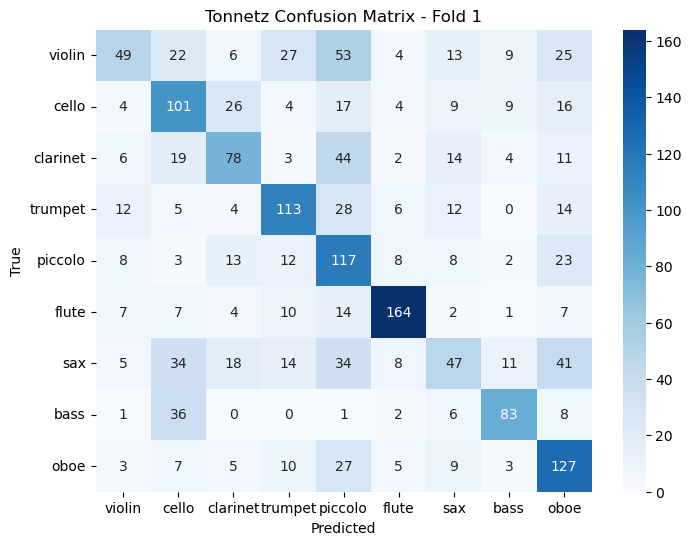

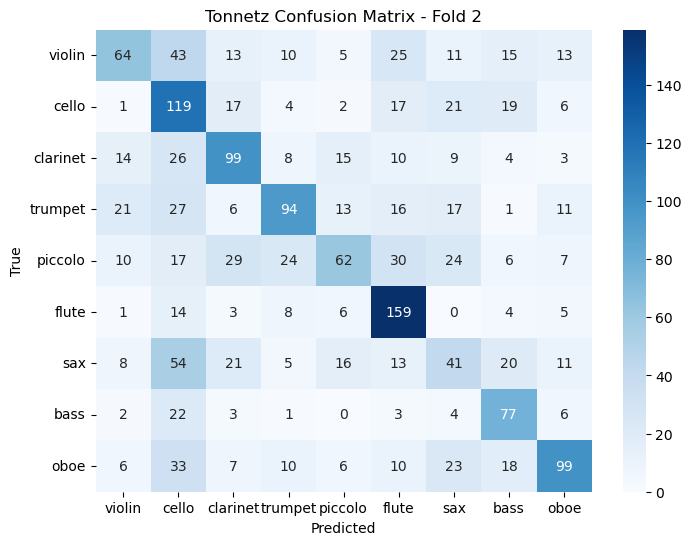

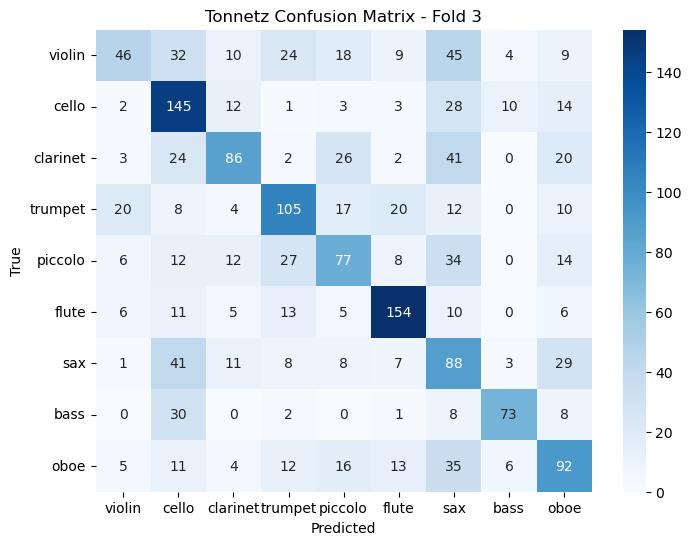

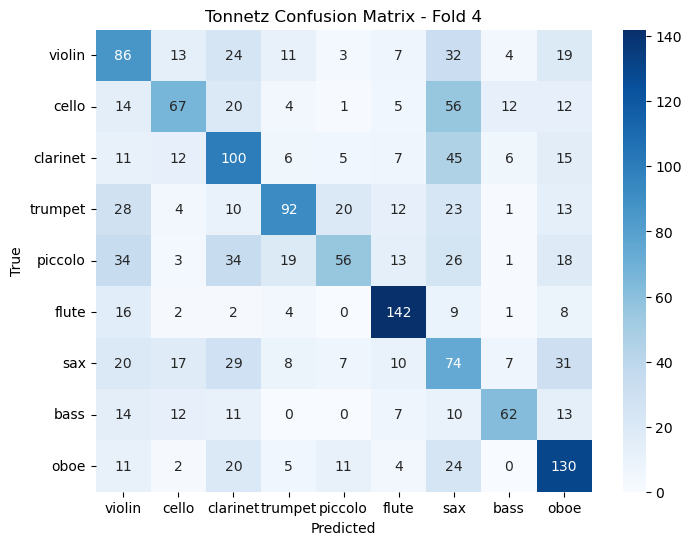

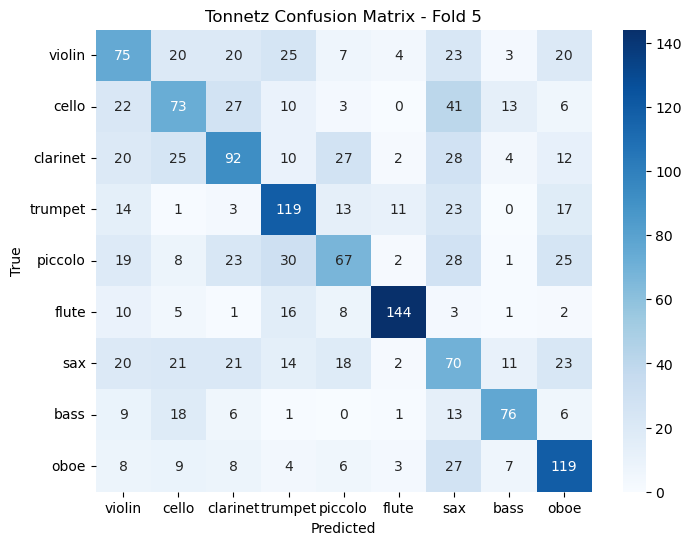


Constant Q Model
Accuracies: [0.9074074029922485, 0.8621887564659119, 0.9218297600746155, 0.9102489948272705, 0.9108280539512634]
Mean: 0.9025, Std: 0.0207, Min: 0.8622, Max: 0.9218


precision    recall  f1-score      support
violin         0.930556  0.966346  0.948113   208.000000
cello          0.983516  0.942105  0.962366   190.000000
clarinet       0.918239  0.806630  0.858824   181.000000
trumpet        0.793103  0.948454  0.863850   194.000000
piccolo        0.919192  0.938144  0.928571   194.000000
flute          0.901786  0.935185  0.918182   216.000000
sax            0.933702  0.797170  0.860051   212.000000
bass           0.951389  1.000000  0.975089   137.000000
oboe           0.875000  0.857143  0.865979   196.000000
accuracy       0.907407  0.907407  0.907407     0.907407
macro avg      0.911831  0.910131  0.909003  1728.000000
weighted avg   0.910521  0.907407  0.906951  1728.000000

precision    recall  f1-score      support
violin         0.977654  0.879397  0.925926   199.000000
cello          0.968586  0.898058  0.931990   206.000000
clarinet       0.839779  0.808511  0.823848   188.000000
trumpet        0.737452  0.927184  0.821505   206.000000
piccolo        0.904523  0.861244  0.882353   209.000000
flute          0.782222  0.880000  0.828235   200.000000
sax            0.905660  0.761905  0.827586   189.000000
bass           0.965217  0.940678  0.952790   118.000000
oboe           0.799087  0.825472  0.812065   212.000000
accuracy       0.862189  0.862189  0.862189     0.862189
macro avg      0.875576  0.864717  0.867367  1727.000000
weighted avg   0.870780  0.862189  0.863591  1727.000000

precision    recall  f1-score     support
violin         0.969849  0.979695  0.974747   197.00000
cello          0.966981  0.940367  0.953488   218.00000
clarinet       0.894737  0.833333  0.862944   204.00000
trumpet        0.904762  0.872449  0.888312   196.00000
piccolo        0.893401  0.926316  0.909561   190.00000
flute          0.923810  0.923810  0.923810   210.00000
sax            0.948980  0.948980  0.948980   196.00000
bass           0.960000  0.983607  0.971660   122.00000
oboe           0.846890  0.912371  0.878412   194.00000
accuracy       0.921830  0.921830  0.921830     0.92183
macro avg      0.923268  0.924547  0.923546  1727.00000
weighted avg   0.922342  0.921830  0.921718  1727.00000

precision    recall  f1-score      support
violin         0.959799  0.959799  0.959799   199.000000
cello          0.937824  0.947644  0.942708   191.000000
clarinet       0.895288  0.826087  0.859296   207.000000
trumpet        0.873171  0.881773  0.877451   203.000000
piccolo        0.889952  0.911765  0.900726   204.000000
flute          0.884422  0.956522  0.919060   184.000000
sax            0.871560  0.935961  0.902613   203.000000
bass           1.000000  0.984496  0.992188   129.000000
oboe           0.919355  0.826087  0.870229   207.000000
accuracy       0.910249  0.910249  0.910249     0.910249
macro avg      0.914597  0.914459  0.913786  1727.000000
weighted avg   0.910955  0.910249  0.909826  1727.000000

precision    recall  f1-score      support
violin         0.944724  0.954315  0.949495   197.000000
cello          0.961538  0.897436  0.928382   195.000000
clarinet       0.808943  0.904545  0.854077   220.000000
trumpet        0.908163  0.885572  0.896725   201.000000
piccolo        0.919811  0.960591  0.939759   203.000000
flute          0.938889  0.889474  0.913514   190.000000
sax            0.870647  0.875000  0.872818   200.000000
bass           0.984733  0.992308  0.988506   130.000000
oboe           0.916667  0.863874  0.889488   191.000000
accuracy       0.910828  0.910828  0.910828     0.910828
macro avg      0.917124  0.913679  0.914752  1727.000000
weighted avg   0.912830  0.910828  0.911131  1727.000000

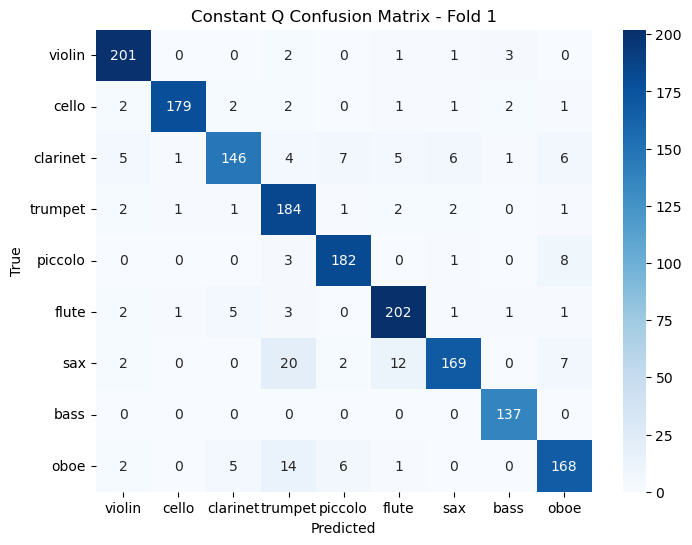

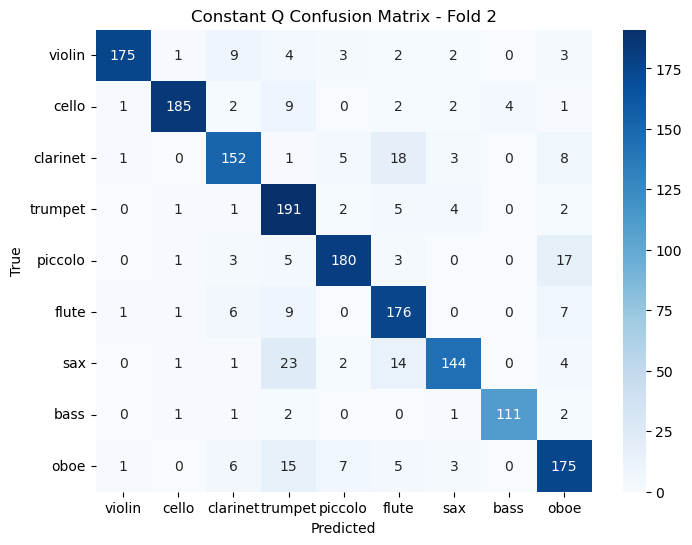

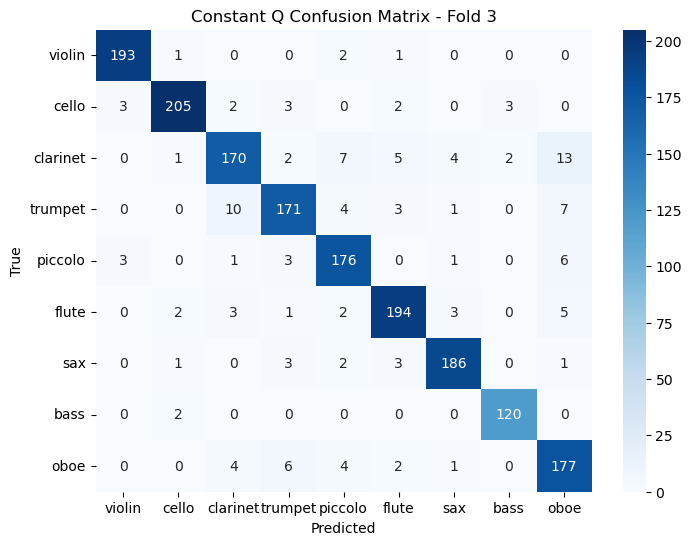

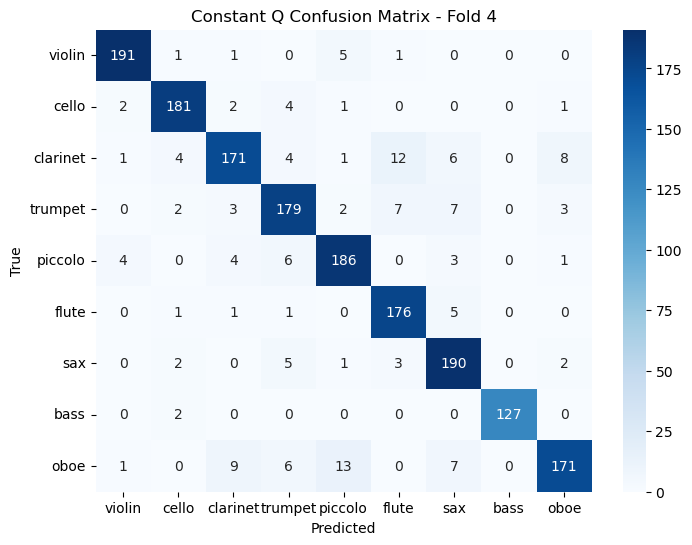

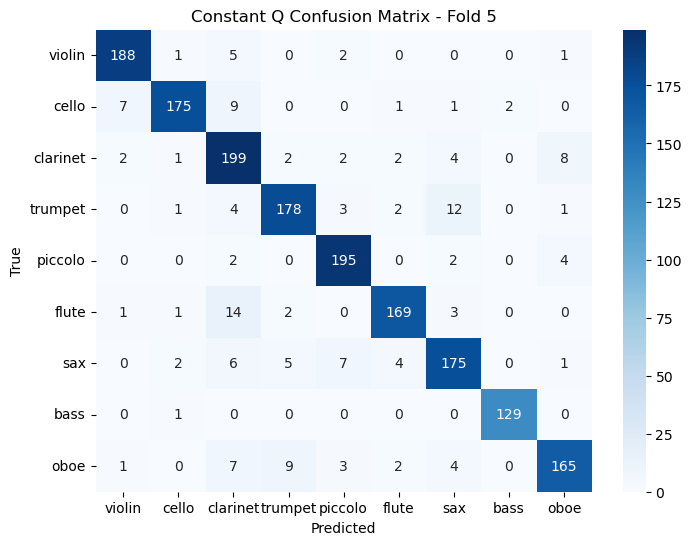


Cqt Model
Accuracies: [0.921875, 0.8737695217132568, 0.9339895844459534, 0.9160393476486206, 0.9224088191986084]
Mean: 0.9136, Std: 0.0208, Min: 0.8738, Max: 0.9340


precision    recall  f1-score      support
violin         0.980296  0.956731  0.968370   208.000000
cello          0.973262  0.957895  0.965517   190.000000
clarinet       0.890173  0.850829  0.870056   181.000000
trumpet        0.936047  0.829897  0.879781   194.000000
piccolo        0.950000  0.881443  0.914439   194.000000
flute          0.932432  0.958333  0.945205   216.000000
sax            0.829876  0.943396  0.883002   212.000000
bass           0.985294  0.978102  0.981685   137.000000
oboe           0.864486  0.943878  0.902439   196.000000
accuracy       0.921875  0.921875  0.921875     0.921875
macro avg      0.926874  0.922278  0.923388  1728.000000
weighted avg   0.924537  0.921875  0.921966  1728.000000

precision    recall  f1-score     support
violin         0.969388  0.954774  0.962025   199.00000
cello          0.948598  0.985437  0.966667   206.00000
clarinet       0.752252  0.888298  0.814634   188.00000
trumpet        0.887417  0.650485  0.750700   206.00000
piccolo        0.950549  0.827751  0.884910   209.00000
flute          0.890052  0.850000  0.869565   200.00000
sax            0.726141  0.925926  0.813953   189.00000
bass           0.974576  0.974576  0.974576   118.00000
oboe           0.858491  0.858491  0.858491   212.00000
accuracy       0.873770  0.873770  0.873770     0.87377
macro avg      0.884163  0.879526  0.877280  1727.00000
weighted avg   0.882146  0.873770  0.873230  1727.00000

precision    recall  f1-score     support
violin         0.955446  0.979695  0.967419   197.00000
cello          0.985849  0.958716  0.972093   218.00000
clarinet       0.900990  0.892157  0.896552   204.00000
trumpet        0.856436  0.882653  0.869347   196.00000
piccolo        0.934783  0.905263  0.919786   190.00000
flute          0.965854  0.942857  0.954217   210.00000
sax            0.939698  0.954082  0.946835   196.00000
bass           0.983740  0.991803  0.987755   122.00000
oboe           0.898990  0.917526  0.908163   194.00000
accuracy       0.933990  0.933990  0.933990     0.93399
macro avg      0.935754  0.936084  0.935796  1727.00000
weighted avg   0.934476  0.933990  0.934106  1727.00000

precision    recall  f1-score      support
violin         0.928571  0.979899  0.953545   199.000000
cello          0.955056  0.890052  0.921409   191.000000
clarinet       0.835681  0.859903  0.847619   207.000000
trumpet        0.900000  0.931034  0.915254   203.000000
piccolo        0.935829  0.857843  0.895141   204.000000
flute          0.916667  0.956522  0.936170   184.000000
sax            0.917949  0.881773  0.899497   203.000000
bass           0.961832  0.976744  0.969231   129.000000
oboe           0.919431  0.937198  0.928230   207.000000
accuracy       0.916039  0.916039  0.916039     0.916039
macro avg      0.919002  0.918997  0.918455  1727.000000
weighted avg   0.916737  0.916039  0.915828  1727.000000

precision    recall  f1-score      support
violin         0.973822  0.944162  0.958763   197.000000
cello          0.964286  0.969231  0.966752   195.000000
clarinet       0.852814  0.895455  0.873614   220.000000
trumpet        0.881773  0.890547  0.886139   201.000000
piccolo        0.935323  0.926108  0.930693   203.000000
flute          0.966102  0.900000  0.931880   190.000000
sax            0.900990  0.910000  0.905473   200.000000
bass           0.969925  0.992308  0.980989   130.000000
oboe           0.891192  0.900524  0.895833   191.000000
accuracy       0.922409  0.922409  0.922409     0.922409
macro avg      0.926247  0.925371  0.925571  1727.000000
weighted avg   0.923376  0.922409  0.922650  1727.000000

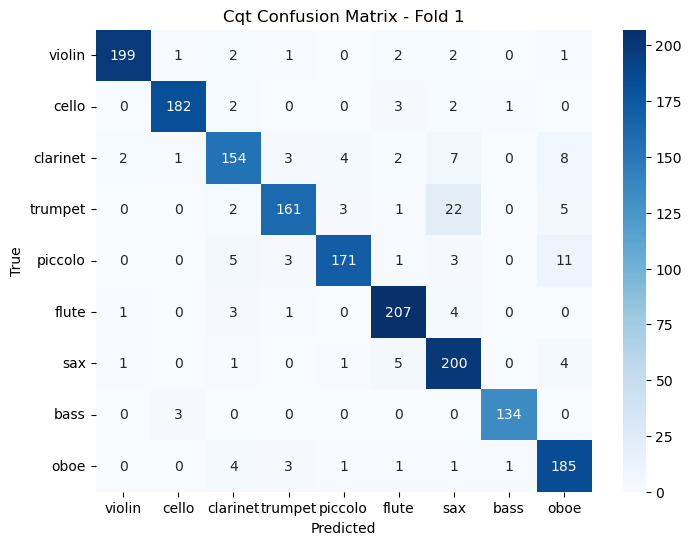

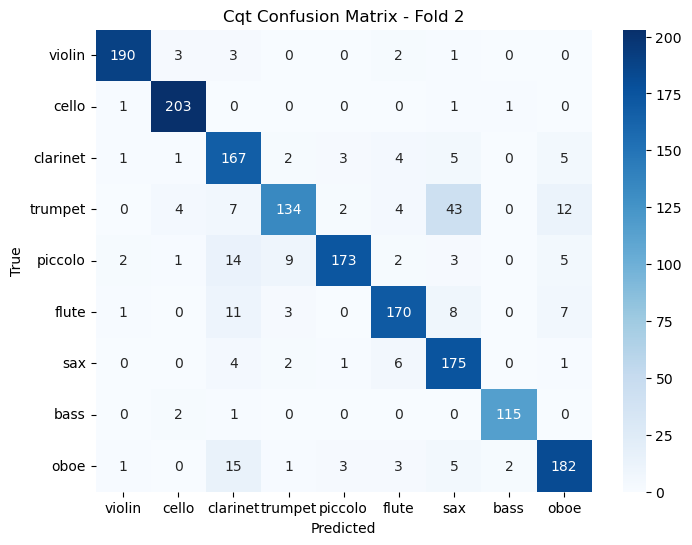

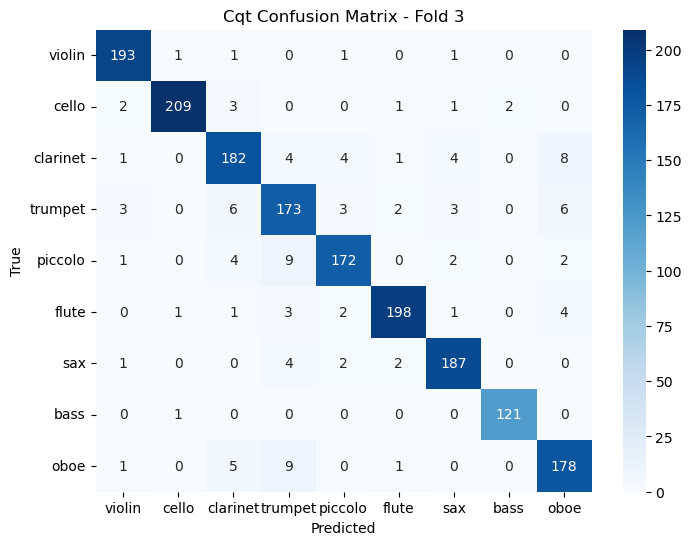

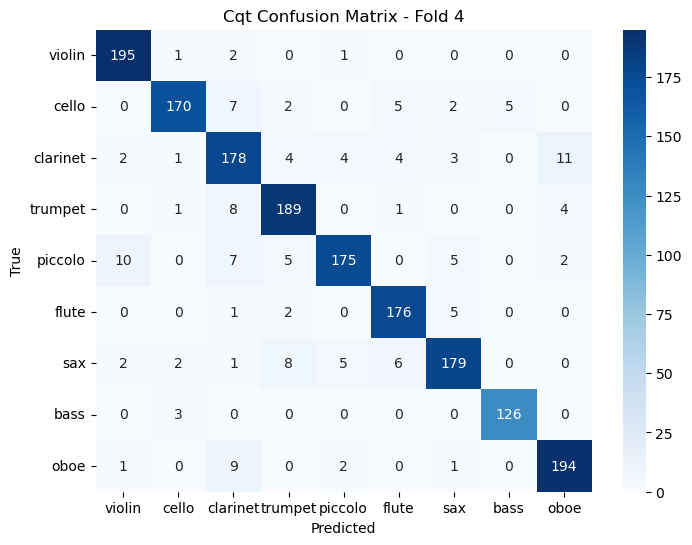

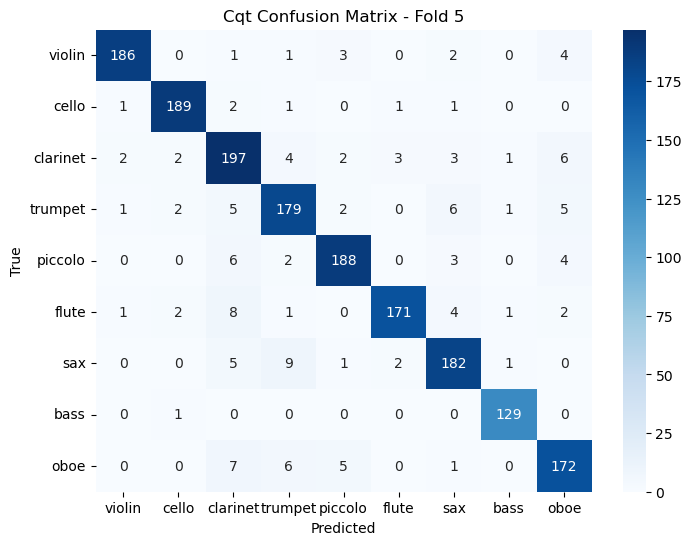


Stft Model
Accuracies: [0.8055555820465088, 0.836711049079895, 0.830341637134552, 0.818760871887207, 0.828604519367218]
Mean: 0.8240, Std: 0.0109, Min: 0.8056, Max: 0.8367


precision    recall  f1-score      support
violin         0.793427  0.812500  0.802850   208.000000
cello          0.706140  0.847368  0.770335   190.000000
clarinet       0.734043  0.762431  0.747967   181.000000
trumpet        0.852071  0.742268  0.793388   194.000000
piccolo        0.846561  0.824742  0.835509   194.000000
flute          0.857798  0.865741  0.861751   216.000000
sax            0.818182  0.721698  0.766917   212.000000
bass           0.928571  0.854015  0.889734   137.000000
oboe           0.776190  0.831633  0.802956   196.000000
accuracy       0.805556  0.805556  0.805556     0.805556
macro avg      0.812554  0.806933  0.807934  1728.000000
weighted avg   0.810001  0.805556  0.805985  1728.000000

precision    recall  f1-score      support
violin         0.855670  0.834171  0.844784   199.000000
cello          0.868020  0.830097  0.848635   206.000000
clarinet       0.788043  0.771277  0.779570   188.000000
trumpet        0.932203  0.800971  0.861619   206.000000
piccolo        0.800905  0.846890  0.823256   209.000000
flute          0.819444  0.885000  0.850962   200.000000
sax            0.720524  0.873016  0.789474   189.000000
bass           0.909091  0.932203  0.920502   118.000000
oboe           0.898936  0.797170  0.845000   212.000000
accuracy       0.836711  0.836711  0.836711     0.836711
macro avg      0.843649  0.841199  0.840422  1727.000000
weighted avg   0.842259  0.836711  0.837409  1727.000000

precision    recall  f1-score      support
violin         0.831461  0.751269  0.789333   197.000000
cello          0.844340  0.821101  0.832558   218.000000
clarinet       0.722467  0.803922  0.761021   204.000000
trumpet        0.913333  0.698980  0.791908   196.000000
piccolo        0.821429  0.847368  0.834197   190.000000
flute          0.836283  0.900000  0.866972   210.000000
sax            0.804651  0.882653  0.841849   196.000000
bass           0.926230  0.926230  0.926230   122.000000
oboe           0.845771  0.876289  0.860759   194.000000
accuracy       0.830342  0.830342  0.830342     0.830342
macro avg      0.838440  0.834201  0.833870  1727.000000
weighted avg   0.834246  0.830342  0.829768  1727.000000

precision    recall  f1-score      support
violin         0.917197  0.723618  0.808989   199.000000
cello          0.843243  0.816754  0.829787   191.000000
clarinet       0.780220  0.685990  0.730077   207.000000
trumpet        0.817259  0.793103  0.805000   203.000000
piccolo        0.709677  0.862745  0.778761   204.000000
flute          0.847368  0.875000  0.860963   184.000000
sax            0.786667  0.871921  0.827103   203.000000
bass           0.937500  0.930233  0.933852   129.000000
oboe           0.823256  0.855072  0.838863   207.000000
accuracy       0.818761  0.818761  0.818761     0.818761
macro avg      0.829154  0.823826  0.823710  1727.000000
weighted avg   0.823813  0.818761  0.818365  1727.000000

precision    recall  f1-score      support
violin         0.854839  0.807107  0.830287   197.000000
cello          0.847458  0.769231  0.806452   195.000000
clarinet       0.797030  0.731818  0.763033   220.000000
trumpet        0.920904  0.810945  0.862434   201.000000
piccolo        0.760000  0.842365  0.799065   203.000000
flute          0.740586  0.931579  0.825175   190.000000
sax            0.861702  0.810000  0.835052   200.000000
bass           0.910448  0.938462  0.924242   130.000000
oboe           0.834171  0.869110  0.851282   191.000000
accuracy       0.828605  0.828605  0.828605     0.828605
macro avg      0.836349  0.834513  0.833002  1727.000000
weighted avg   0.833308  0.828605  0.828484  1727.000000

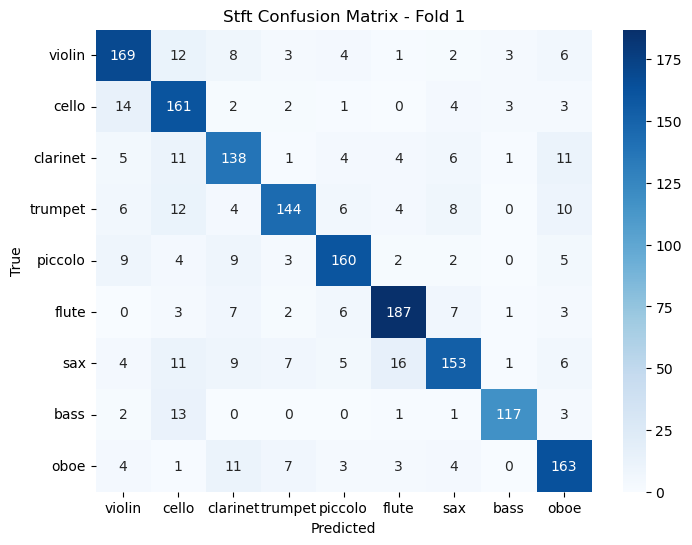

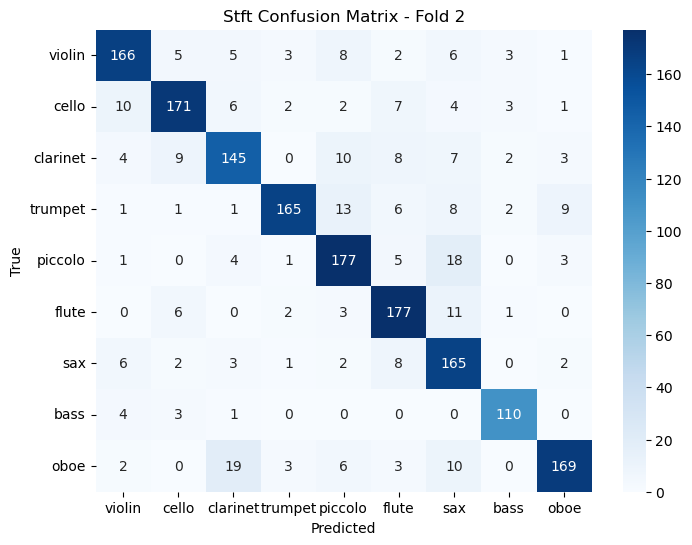

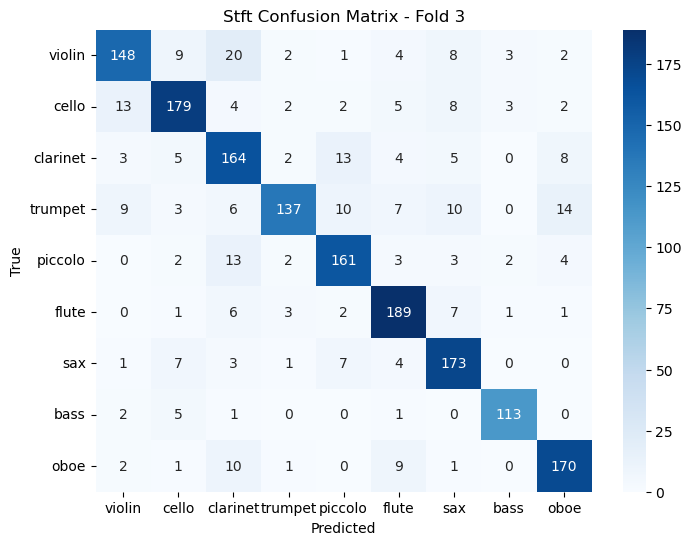

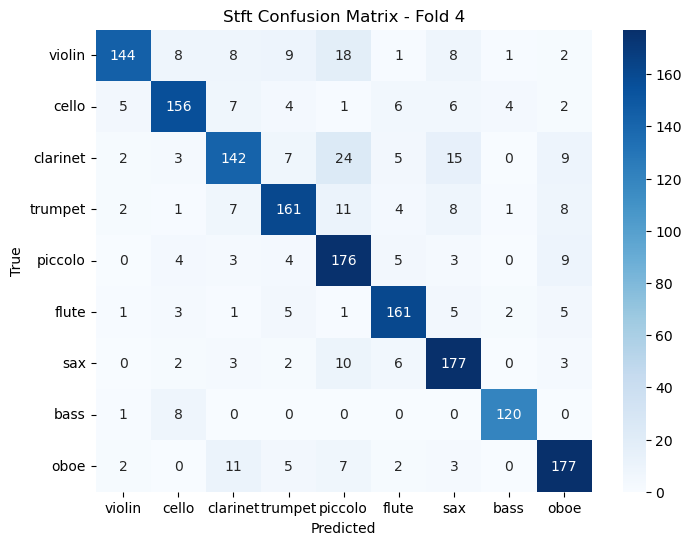

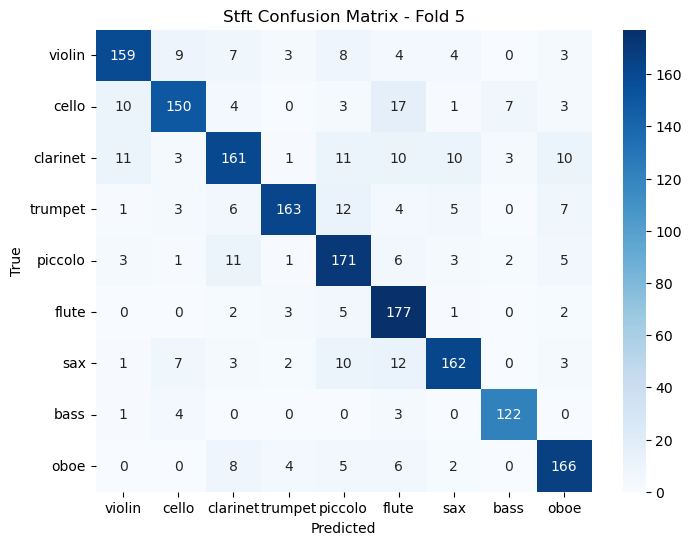


Harmonic Percussive Model
Accuracies: [0.9230324029922485, 0.9409380555152893, 0.8540822267532349, 0.9148812890052795, 0.9386218786239624]
Mean: 0.9143, Std: 0.0316, Min: 0.8541, Max: 0.9409


precision    recall  f1-score      support
violin         0.878788  0.975962  0.924829   208.000000
cello          0.904040  0.942105  0.922680   190.000000
clarinet       0.884393  0.845304  0.864407   181.000000
trumpet        0.982143  0.850515  0.911602   194.000000
piccolo        0.941799  0.917526  0.929504   194.000000
flute          0.967136  0.953704  0.960373   216.000000
sax            0.886957  0.962264  0.923077   212.000000
bass           0.992248  0.934307  0.962406   137.000000
oboe           0.908629  0.913265  0.910941   196.000000
accuracy       0.923032  0.923032  0.923032     0.923032
macro avg      0.927348  0.921661  0.923313  1728.000000
weighted avg   0.925255  0.923032  0.922936  1728.000000

precision    recall  f1-score      support
violin         0.876652  1.000000  0.934272   199.000000
cello          0.989474  0.912621  0.949495   206.000000
clarinet       0.879397  0.930851  0.904393   188.000000
trumpet        0.985366  0.980583  0.982968   206.000000
piccolo        1.000000  0.846890  0.917098   209.000000
flute          0.951691  0.985000  0.968059   200.000000
sax            0.988571  0.915344  0.950549   189.000000
bass           0.974576  0.974576  0.974576   118.000000
oboe           0.868996  0.938679  0.902494   212.000000
accuracy       0.940938  0.940938  0.940938     0.940938
macro avg      0.946080  0.942727  0.942656  1727.000000
weighted avg   0.944993  0.940938  0.941113  1727.000000

precision    recall  f1-score      support
violin         0.837104  0.939086  0.885167   197.000000
cello          0.942029  0.894495  0.917647   218.000000
clarinet       0.895349  0.754902  0.819149   204.000000
trumpet        0.868293  0.908163  0.887781   196.000000
piccolo        0.986667  0.778947  0.870588   190.000000
flute          0.983957  0.876190  0.926952   210.000000
sax            0.554545  0.933673  0.695817   196.000000
bass           0.957265  0.918033  0.937238   122.000000
oboe           0.985507  0.701031  0.819277   194.000000
accuracy       0.854082  0.854082  0.854082     0.854082
macro avg      0.890080  0.856058  0.862180  1727.000000
weighted avg   0.888171  0.854082  0.860030  1727.000000

precision    recall  f1-score      support
violin         0.972973  0.904523  0.937500   199.000000
cello          0.956522  0.921466  0.938667   191.000000
clarinet       0.873171  0.864734  0.868932   207.000000
trumpet        0.994444  0.881773  0.934726   203.000000
piccolo        0.929648  0.906863  0.918114   204.000000
flute          0.922280  0.967391  0.944297   184.000000
sax            0.948980  0.916256  0.932331   203.000000
bass           0.954887  0.984496  0.969466   129.000000
oboe           0.753968  0.917874  0.827887   207.000000
accuracy       0.914881  0.914881  0.914881     0.914881
macro avg      0.922986  0.918375  0.919102  1727.000000
weighted avg   0.920775  0.914881  0.916160  1727.000000

precision    recall  f1-score      support
violin         0.936275  0.969543  0.952618   197.000000
cello          0.933333  0.933333  0.933333   195.000000
clarinet       0.909524  0.868182  0.888372   220.000000
trumpet        0.973684  0.920398  0.946292   201.000000
piccolo        0.950495  0.945813  0.948148   203.000000
flute          0.940299  0.994737  0.966752   190.000000
sax            0.950249  0.955000  0.952618   200.000000
bass           0.984375  0.969231  0.976744   130.000000
oboe           0.887755  0.910995  0.899225   191.000000
accuracy       0.938622  0.938622  0.938622     0.938622
macro avg      0.940665  0.940803  0.940456  1727.000000
weighted avg   0.938876  0.938622  0.938461  1727.000000

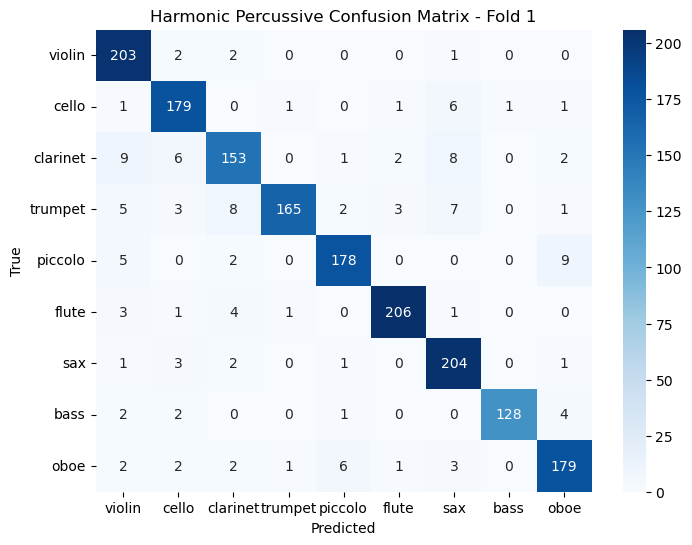

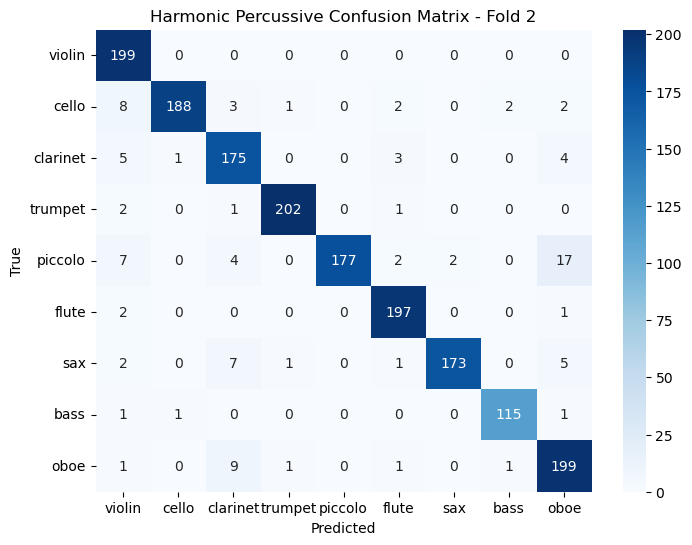

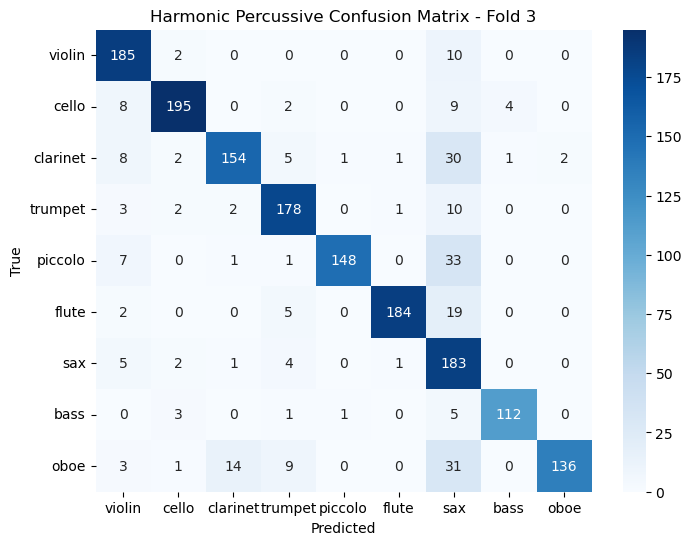

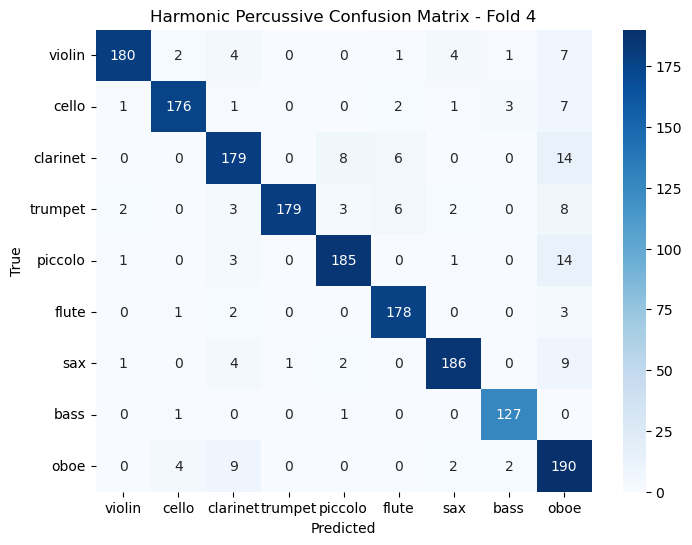

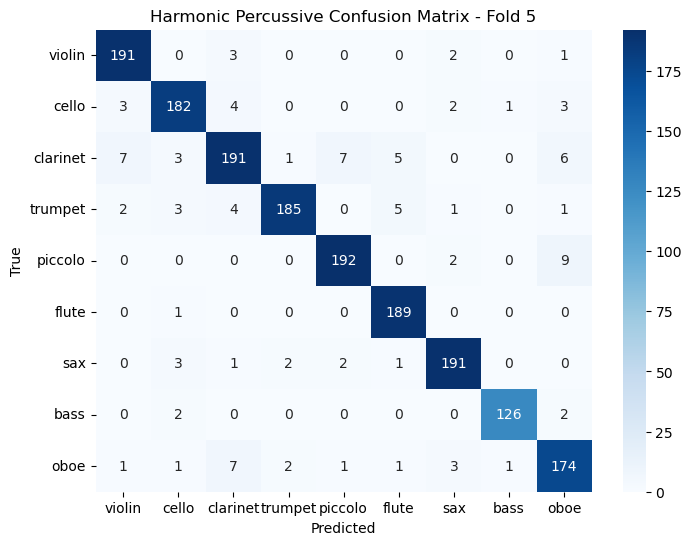


Onset Strength Model
Accuracies: [0.2899305522441864, 0.3005211353302002, 0.3068905472755432, 0.31789231300354004, 0.31847134232521057]
Mean: 0.3067, Std: 0.0108, Min: 0.2899, Max: 0.3185


precision    recall  f1-score      support
violin         0.490909  0.259615  0.339623   208.000000
cello          0.227848  0.189474  0.206897   190.000000
clarinet       0.257143  0.198895  0.224299   181.000000
trumpet        0.325243  0.345361  0.335000   194.000000
piccolo        0.175355  0.190722  0.182716   194.000000
flute          0.285024  0.273148  0.278960   216.000000
sax            0.216667  0.367925  0.272727   212.000000
bass           0.474026  0.532847  0.501718   137.000000
oboe           0.335165  0.311224  0.322751   196.000000
accuracy       0.289931  0.289931  0.289931     0.289931
macro avg      0.309709  0.296579  0.296077  1728.000000
weighted avg   0.305088  0.289931  0.289962  1728.000000

precision    recall  f1-score      support
violin         0.405941  0.206030  0.273333   199.000000
cello          0.255708  0.271845  0.263529   206.000000
clarinet       0.243056  0.372340  0.294118   188.000000
trumpet        0.344961  0.432039  0.383621   206.000000
piccolo        0.271429  0.272727  0.272076   209.000000
flute          0.234848  0.155000  0.186747   200.000000
sax            0.158273  0.116402  0.134146   189.000000
bass           0.503145  0.677966  0.577617   118.000000
oboe           0.330317  0.344340  0.337182   212.000000
accuracy       0.300521  0.300521  0.300521     0.300521
macro avg      0.305297  0.316521  0.302486  1727.000000
weighted avg   0.297177  0.300521  0.290798  1727.000000

precision    recall  f1-score      support
violin         0.327273  0.274112  0.298343   197.000000
cello          0.254438  0.197248  0.222222   218.000000
clarinet       0.237968  0.436275  0.307958   204.000000
trumpet        0.401786  0.229592  0.292208   196.000000
piccolo        0.191336  0.278947  0.226981   190.000000
flute          0.315972  0.433333  0.365462   210.000000
sax            0.336842  0.163265  0.219931   196.000000
bass           0.550336  0.672131  0.605166   122.000000
oboe           0.418367  0.211340  0.280822   194.000000
accuracy       0.306891  0.306891  0.306891     0.306891
macro avg      0.337146  0.321805  0.313233  1727.000000
weighted avg   0.326734  0.306891  0.300292  1727.000000

precision    recall  f1-score      support
violin         0.355372  0.216080  0.268750   199.000000
cello          0.296875  0.198953  0.238245   191.000000
clarinet       0.379310  0.265700  0.312500   207.000000
trumpet        0.345946  0.315271  0.329897   203.000000
piccolo        0.200000  0.250000  0.222222   204.000000
flute          0.333333  0.483696  0.394678   184.000000
sax            0.222222  0.187192  0.203209   203.000000
bass           0.556291  0.651163  0.600000   129.000000
oboe           0.286184  0.420290  0.340509   207.000000
accuracy       0.317892  0.317892  0.317892     0.317892
macro avg      0.330615  0.332038  0.323334  1727.000000
weighted avg   0.321026  0.317892  0.311368  1727.000000

precision    recall  f1-score      support
violin         0.389535  0.340102  0.363144   197.000000
cello          0.255814  0.112821  0.156584   195.000000
clarinet       0.232759  0.613636  0.337500   220.000000
trumpet        0.394737  0.298507  0.339943   201.000000
piccolo        0.309735  0.172414  0.221519   203.000000
flute          0.326389  0.247368  0.281437   190.000000
sax            0.258503  0.190000  0.219020   200.000000
bass           0.531034  0.592308  0.560000   130.000000
oboe           0.367021  0.361257  0.364116   191.000000
accuracy       0.318471  0.318471  0.318471     0.318471
macro avg      0.340614  0.325379  0.315918  1727.000000
weighted avg   0.331730  0.318471  0.306452  1727.000000

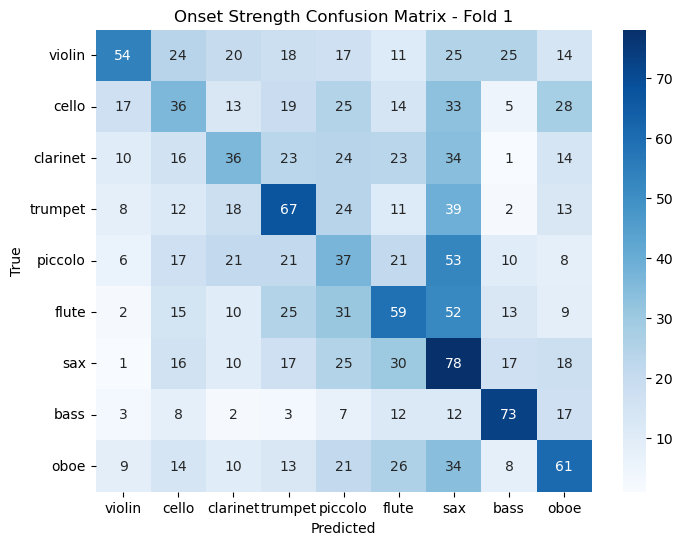

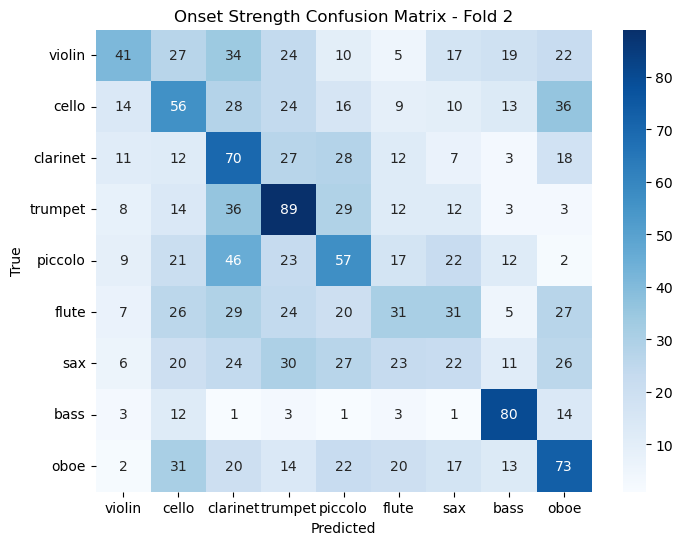

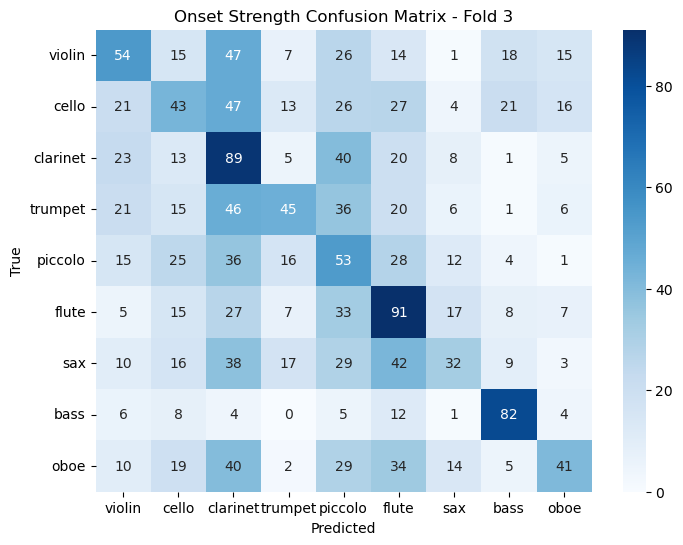

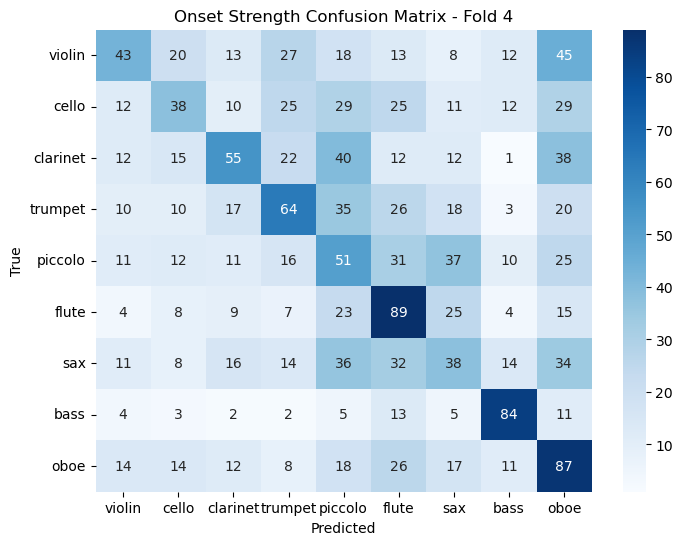

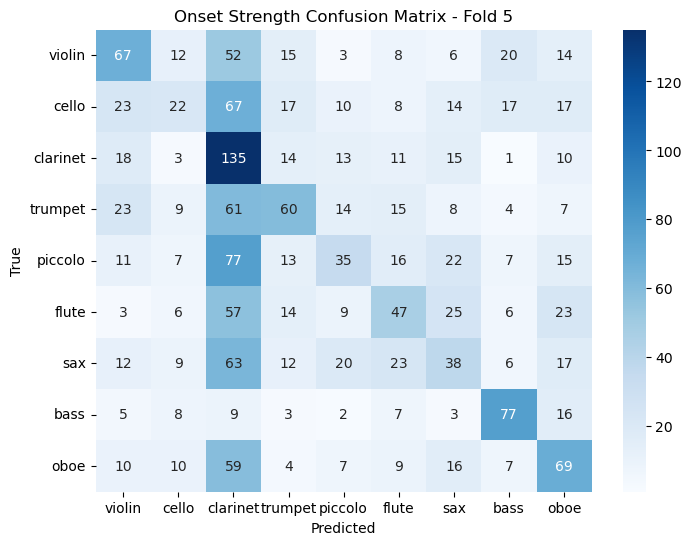

In [9]:
# Show detailed results for each feature type
for feature_type, results in individual_results.items():
    print(f"\n{'='*40}")
    print(f"{feature_type.replace('_', ' ').title()} Model")
    print(f"{'='*40}")
    accs = results['accuracy_list']
    print(f"Accuracies: {accs}")
    print(f"Mean: {np.mean(accs):.4f}, Std: {np.std(accs):.4f}, Min: {np.min(accs):.4f}, Max: {np.max(accs):.4f}")

    # Classification reports
    for i, report in enumerate(results['classification_reports']):
        df = pd.DataFrame(report).transpose()
        df.index = [class_names[int(idx)] if idx.isdigit() and int(idx) < len(class_names) else idx for idx in df.index]
        display(df)

    # Confusion matrices
    for i, conf_matrix in enumerate(results['confusion_matrices']):
        plt.figure(figsize=(8, 6))
        sns.heatmap(np.array(conf_matrix), annot=True, fmt="d", cmap="Blues",
                    xticklabels=class_names, yticklabels=class_names)
        plt.title(f"{feature_type.replace('_', ' ').title()} Confusion Matrix - Fold {i+1}")
        plt.xlabel("Predicted")
        plt.ylabel("True")
        plt.show()

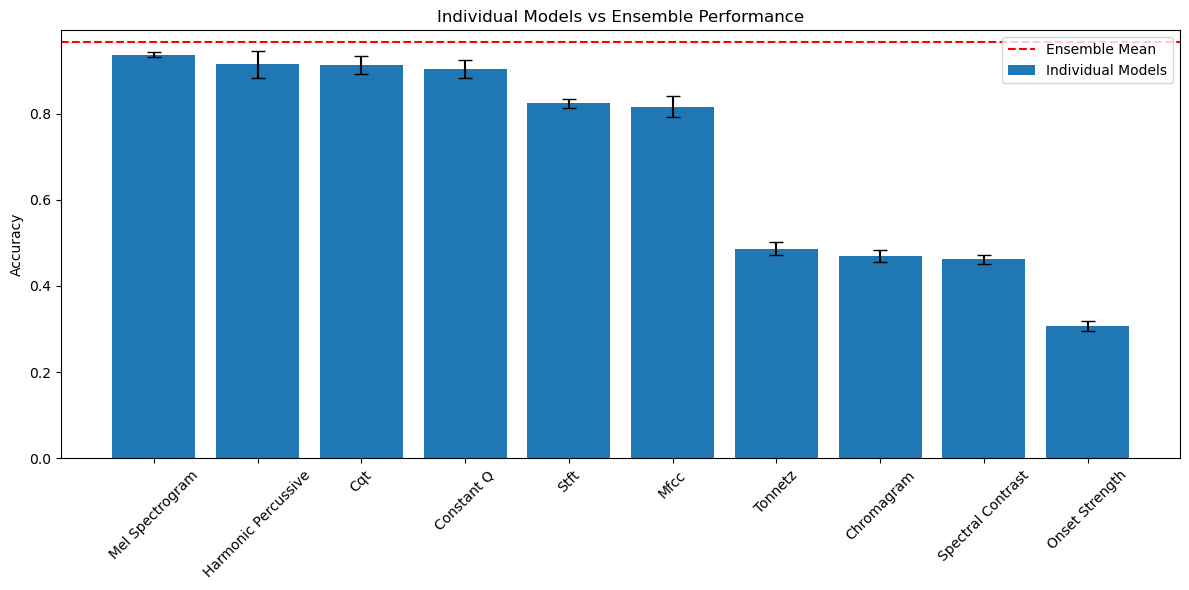

In [10]:
# Visual comparison of individual vs ensemble performance
plt.figure(figsize=(12, 6))
plt.bar(performance_df['Feature Type'], performance_df['Mean Accuracy'], yerr=performance_df['Std Accuracy'], capsize=5, label='Individual Models')
plt.axhline(np.mean(ensemble_results['accuracy_list']), color='red', linestyle='--', label='Ensemble Mean')
plt.ylabel('Accuracy')
plt.title('Individual Models vs Ensemble Performance')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


Mel Spectrogram Training History


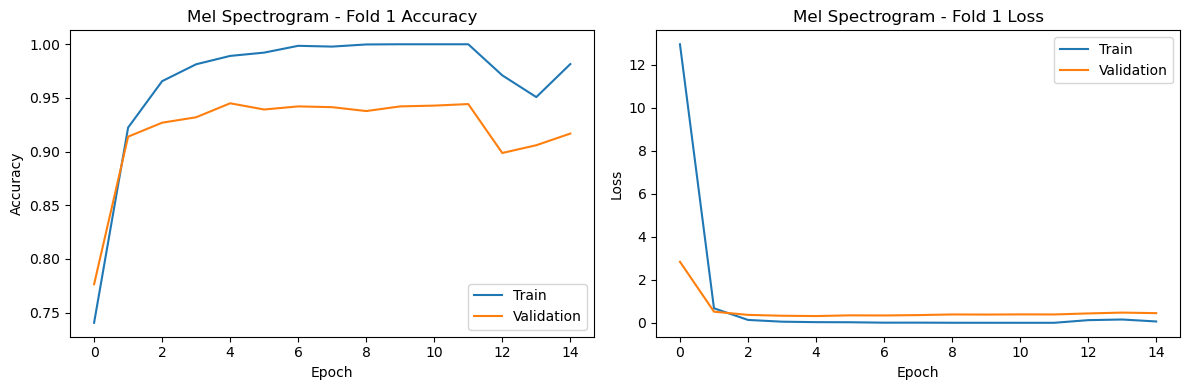

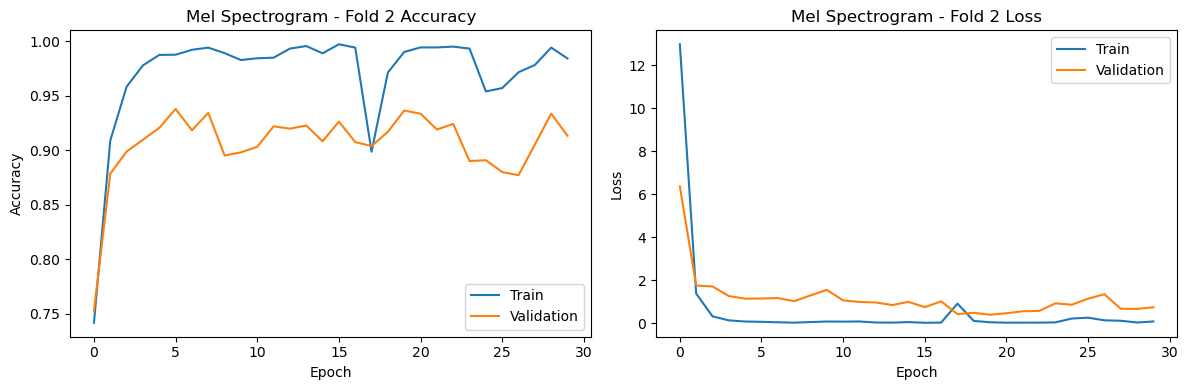

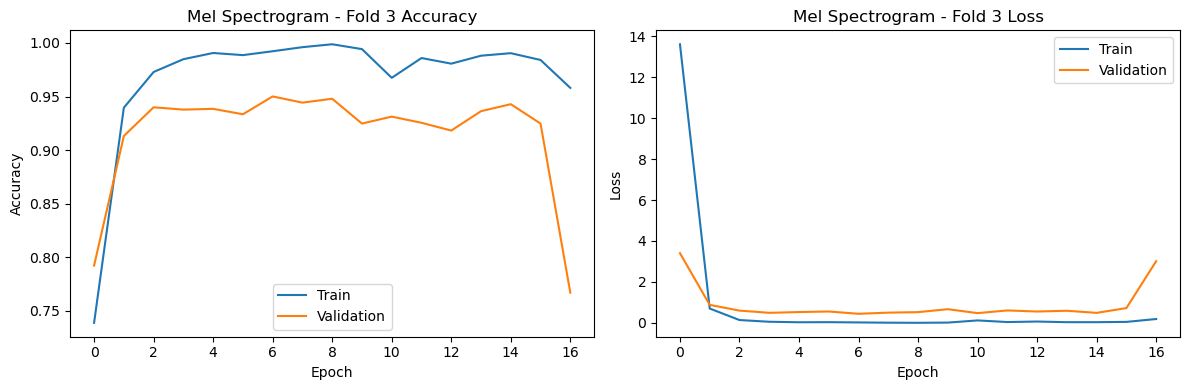

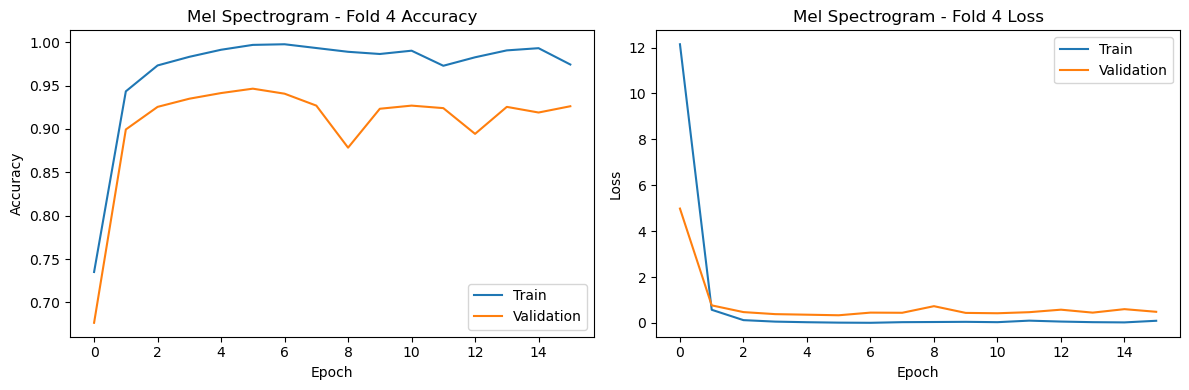

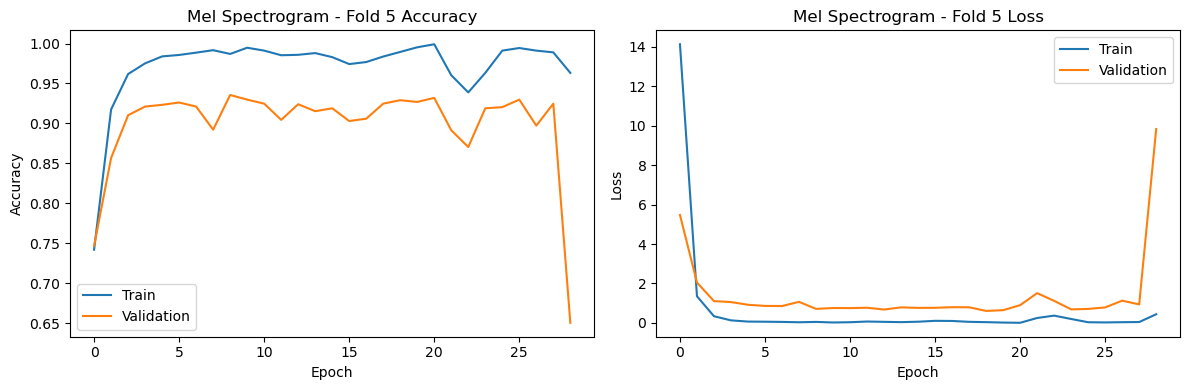


Mfcc Training History


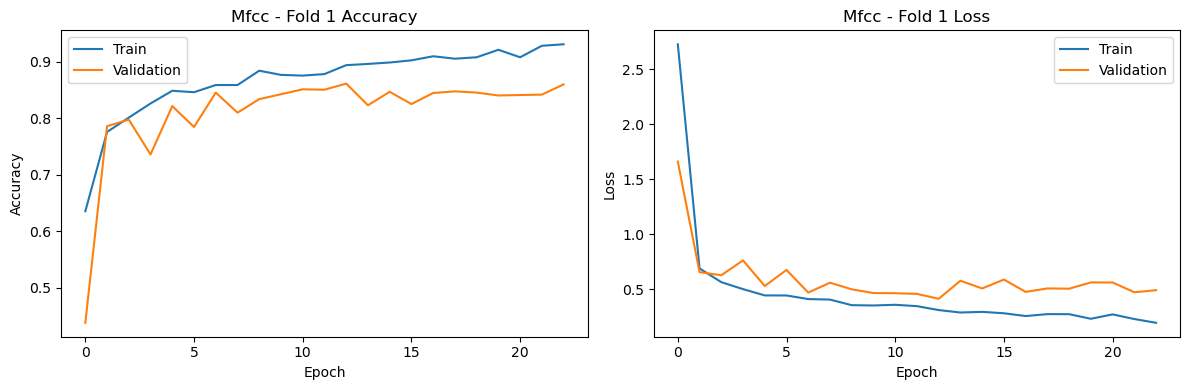

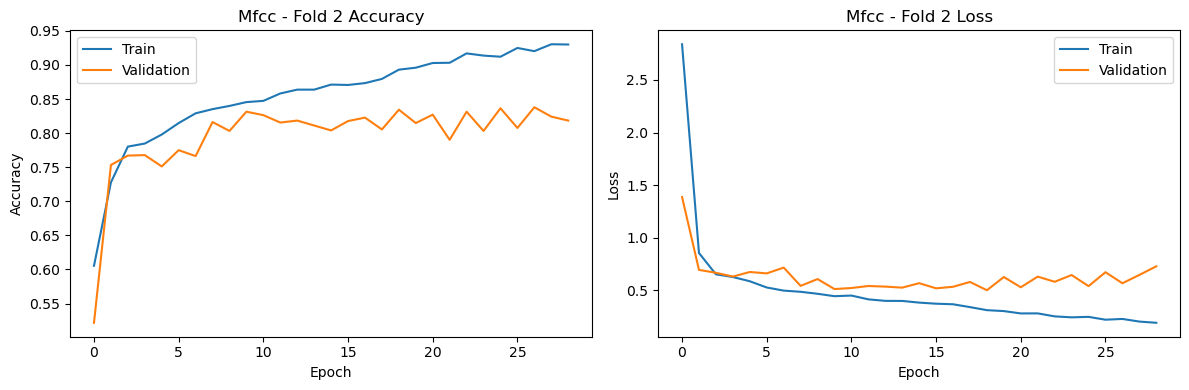

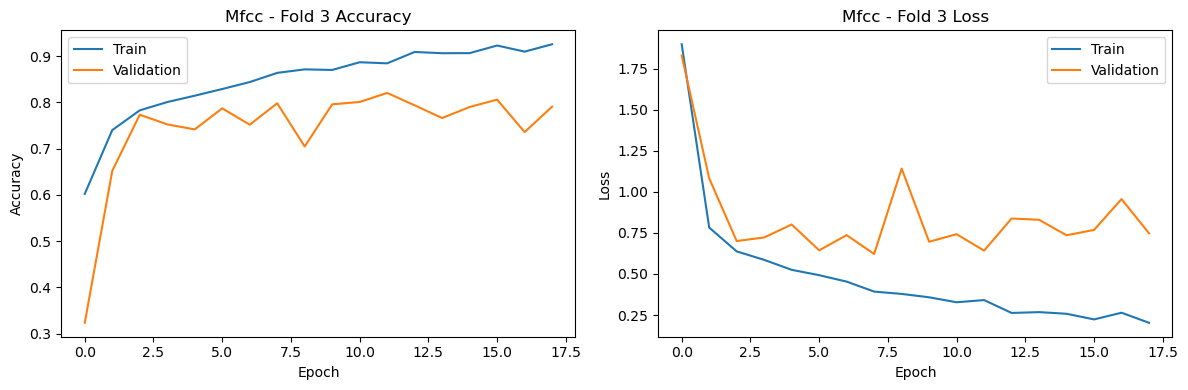

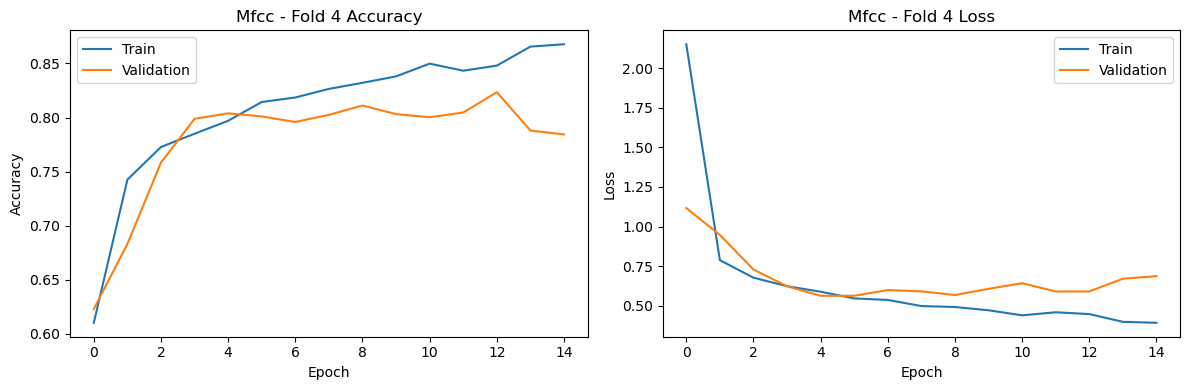

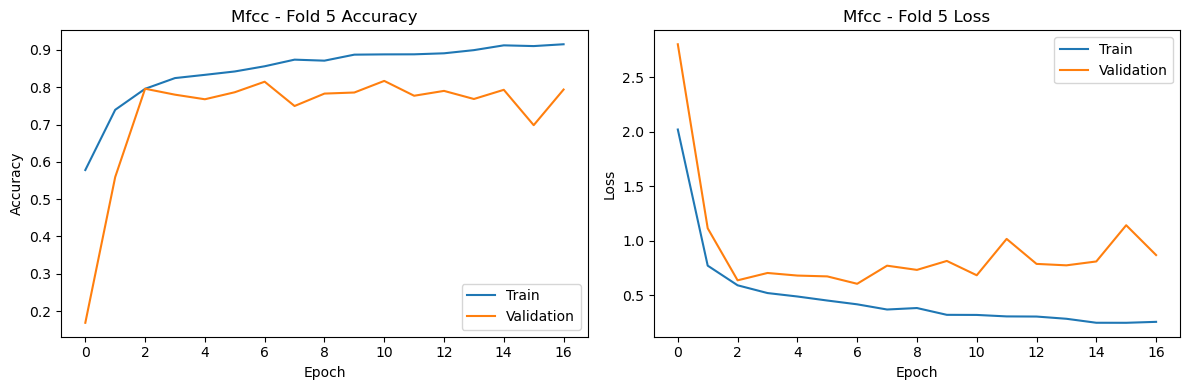


Chromagram Training History


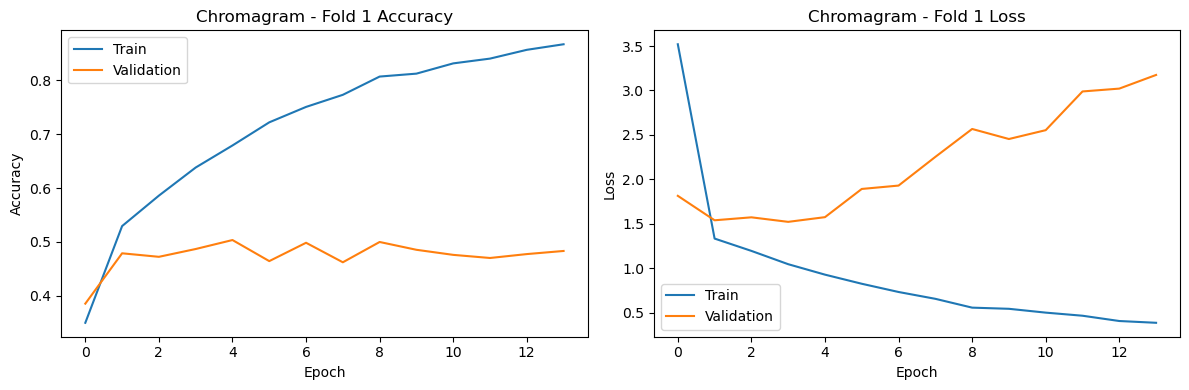

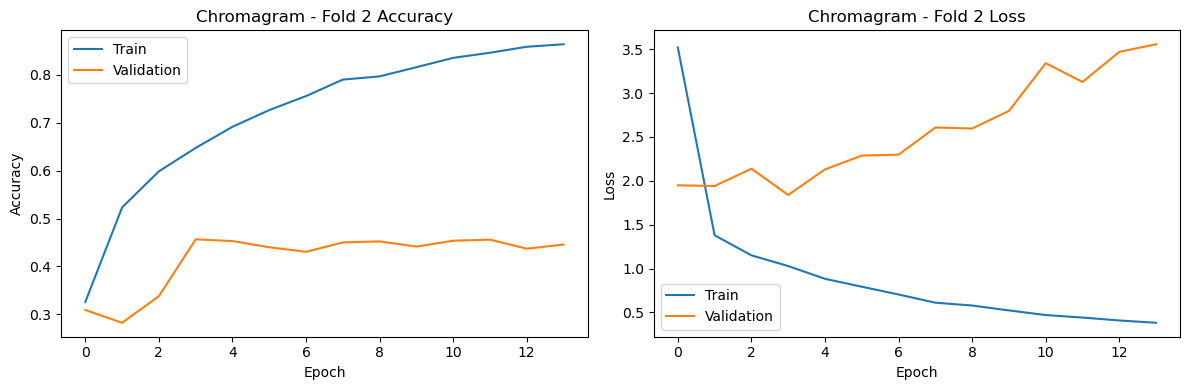

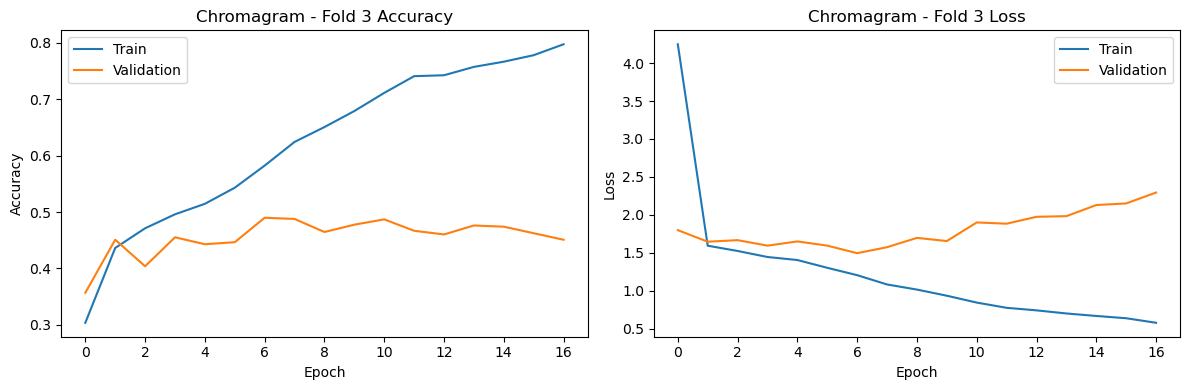

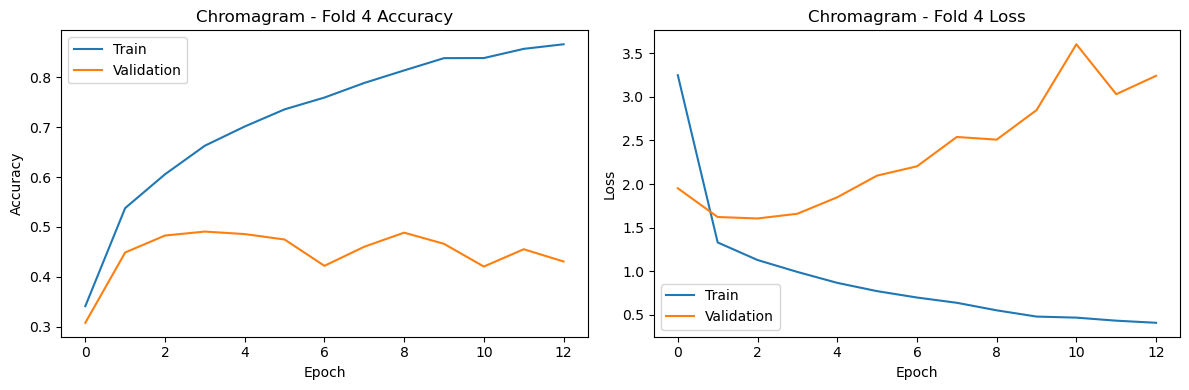

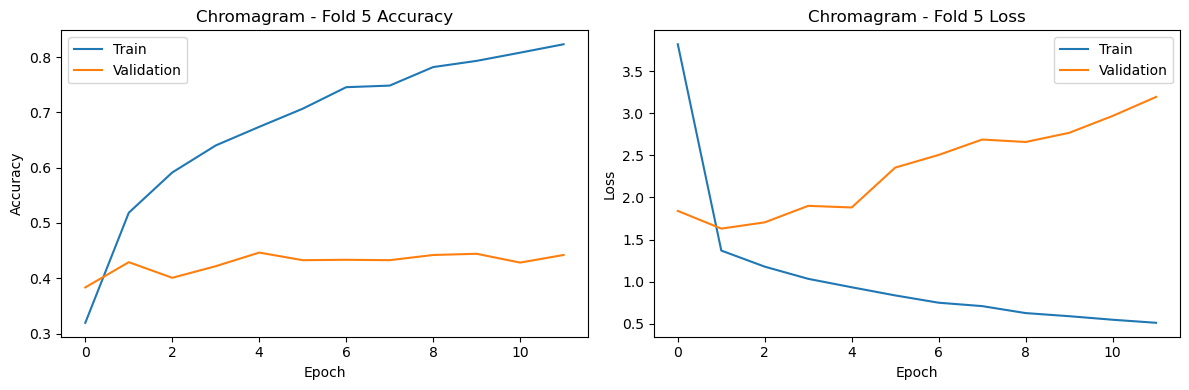


Spectral Contrast Training History


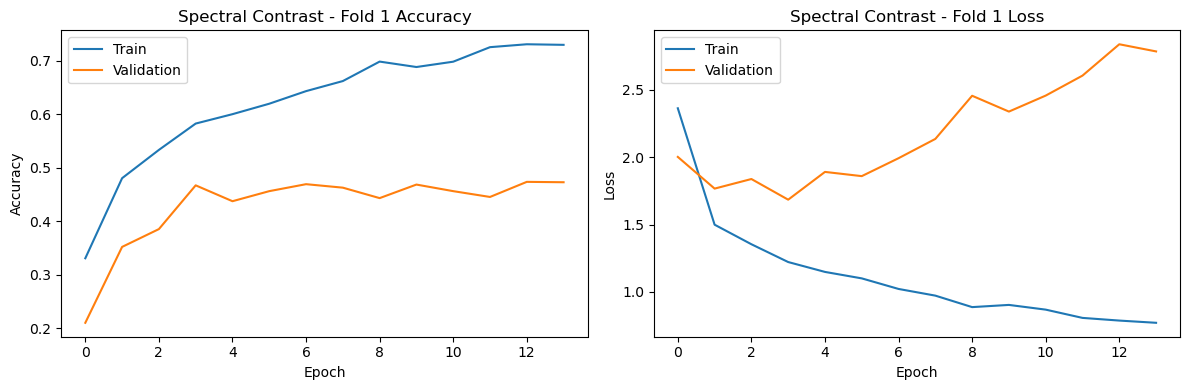

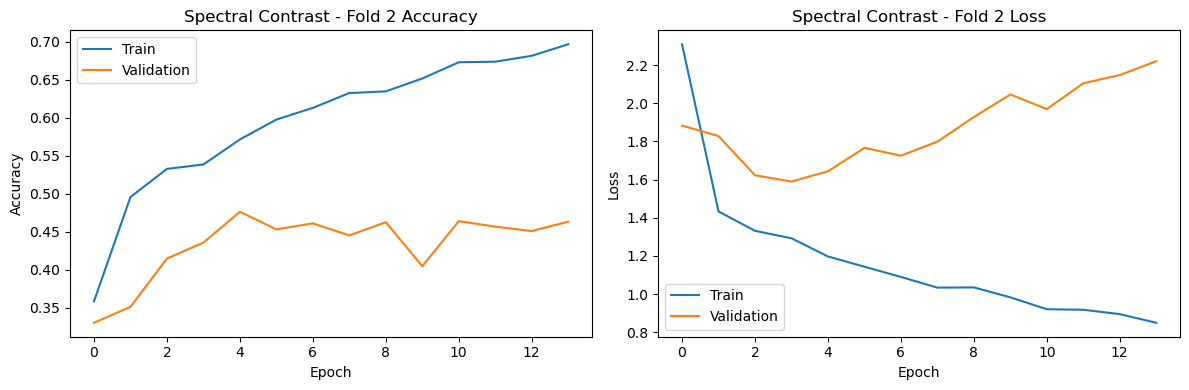

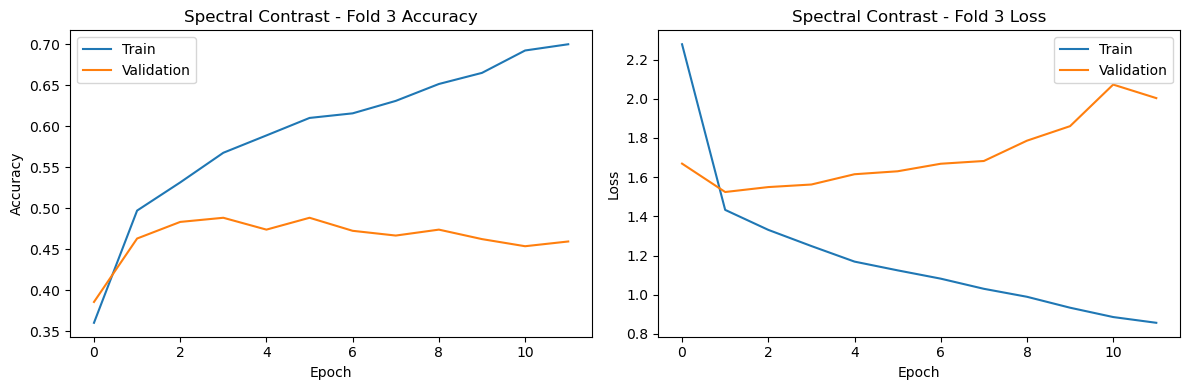

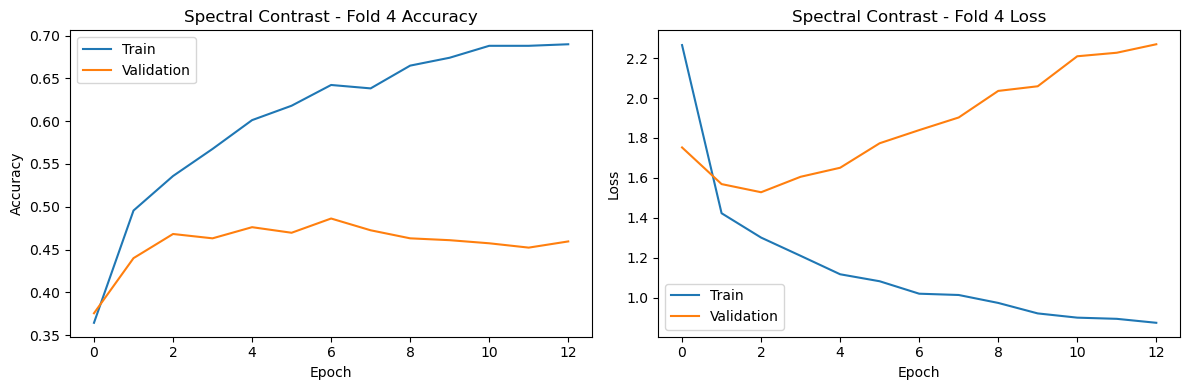

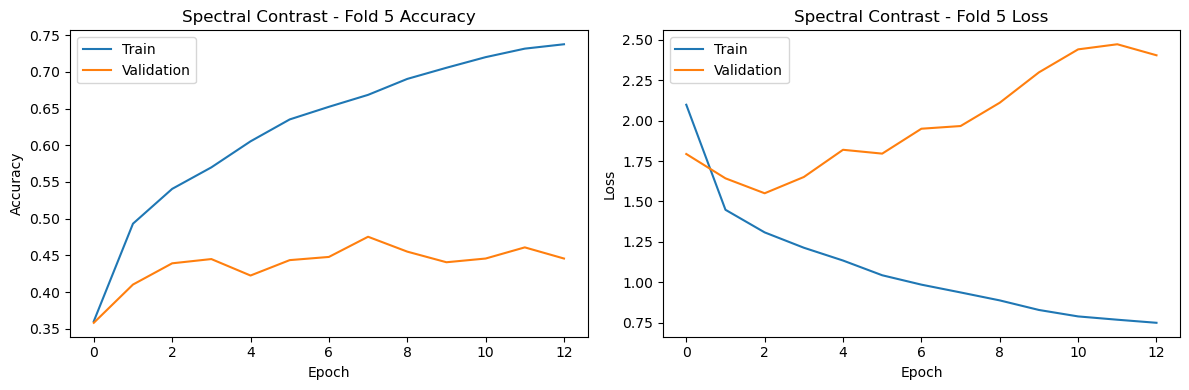


Tonnetz Training History


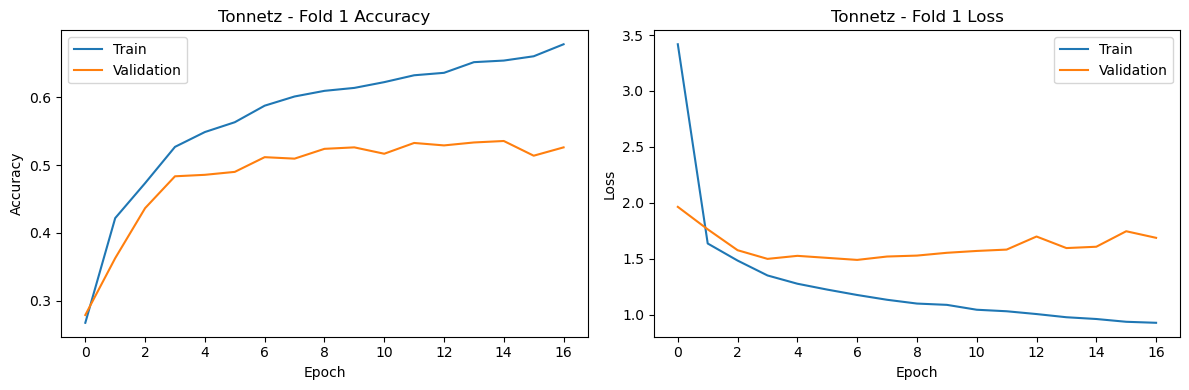

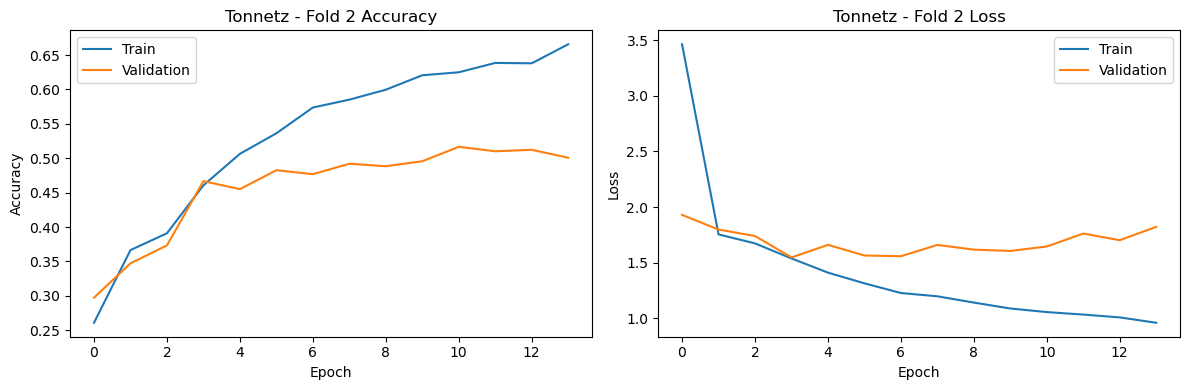

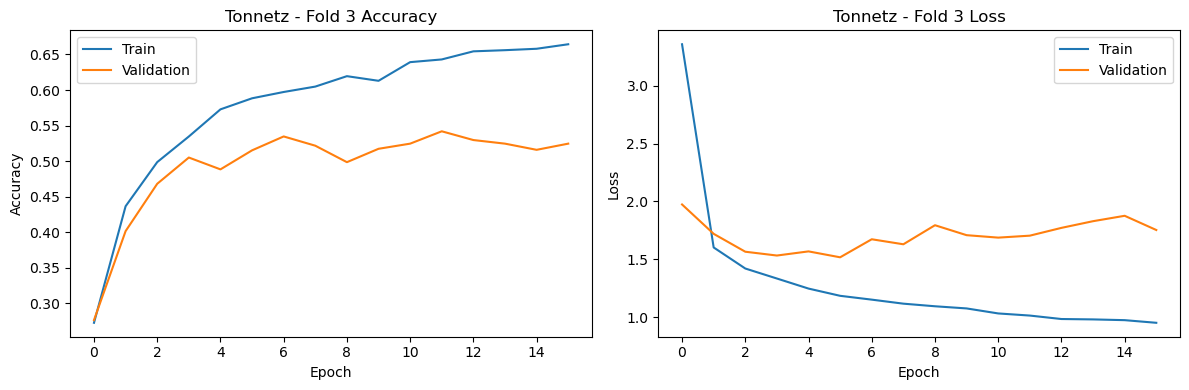

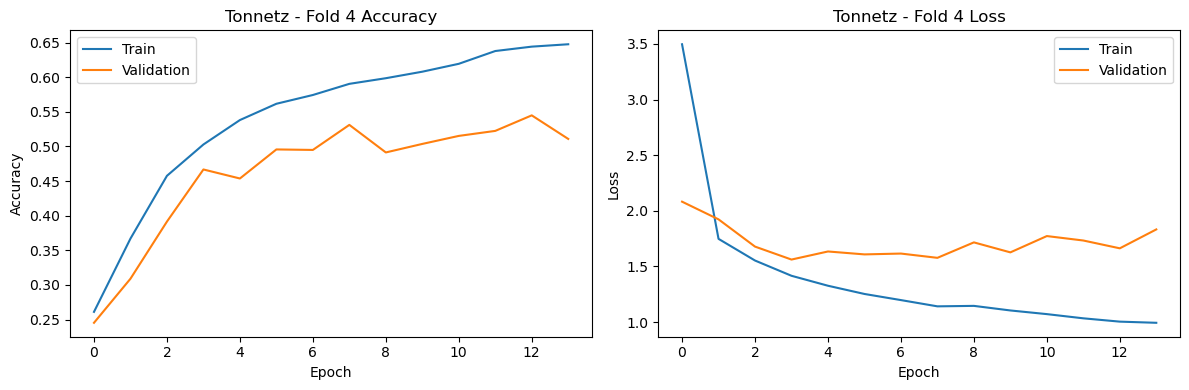

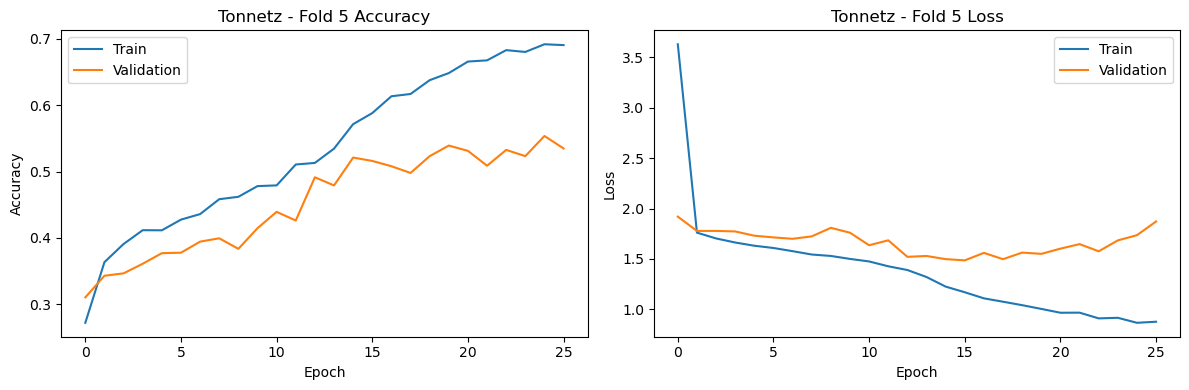


Constant Q Training History


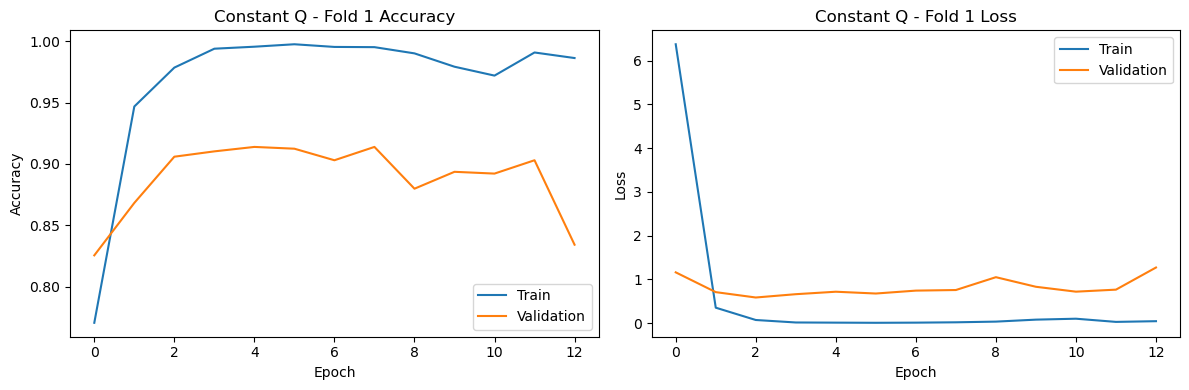

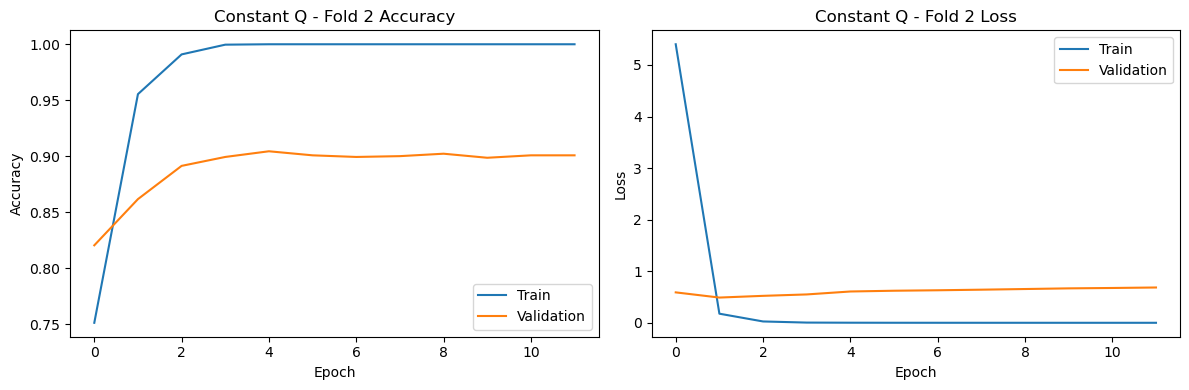

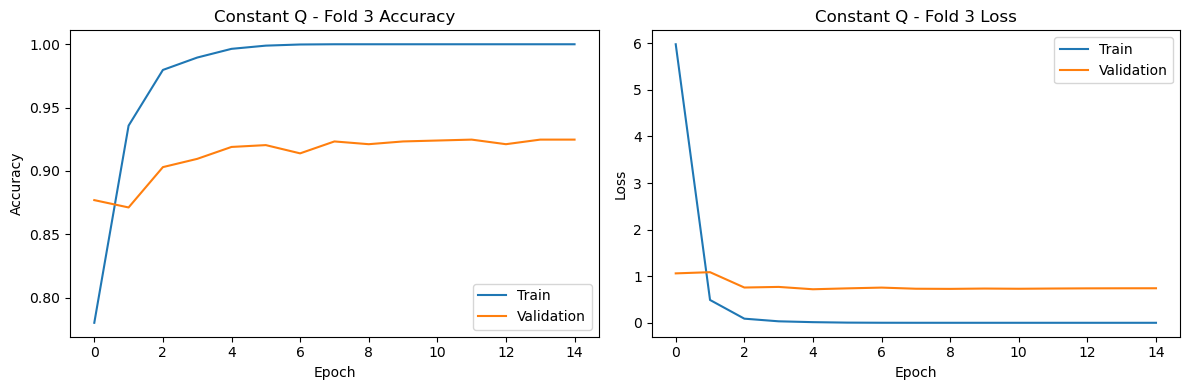

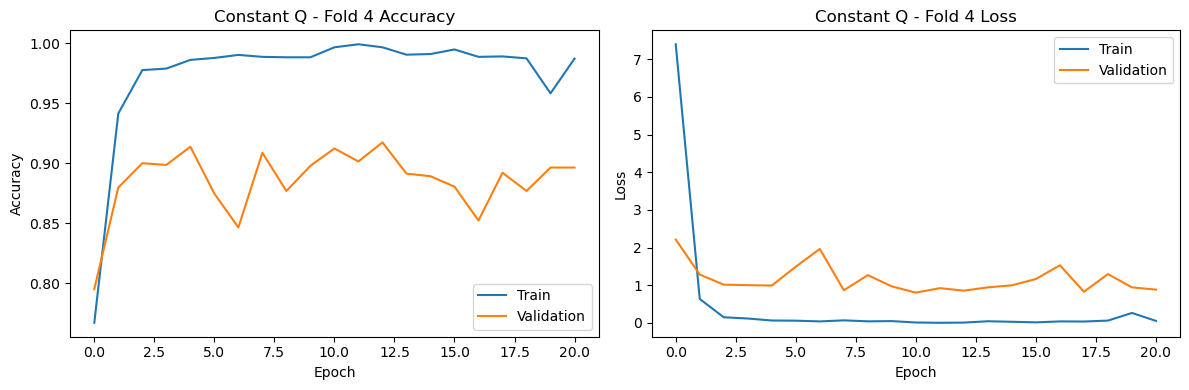

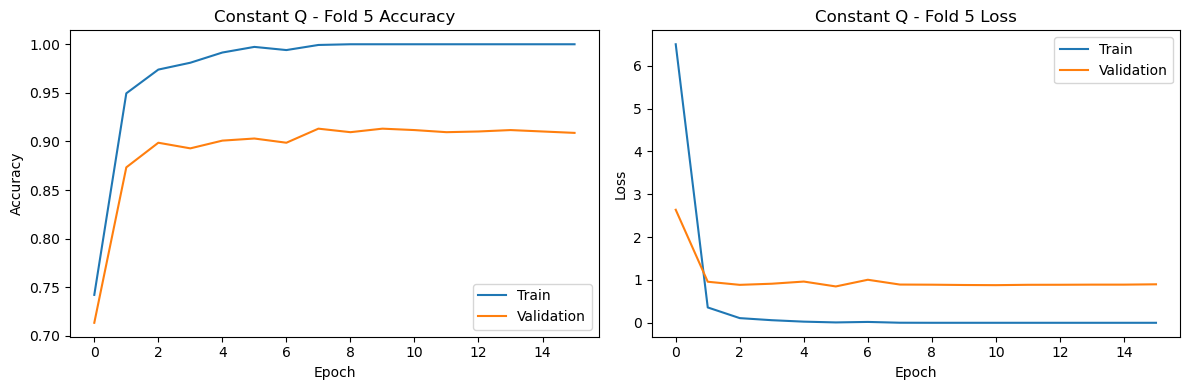


Cqt Training History


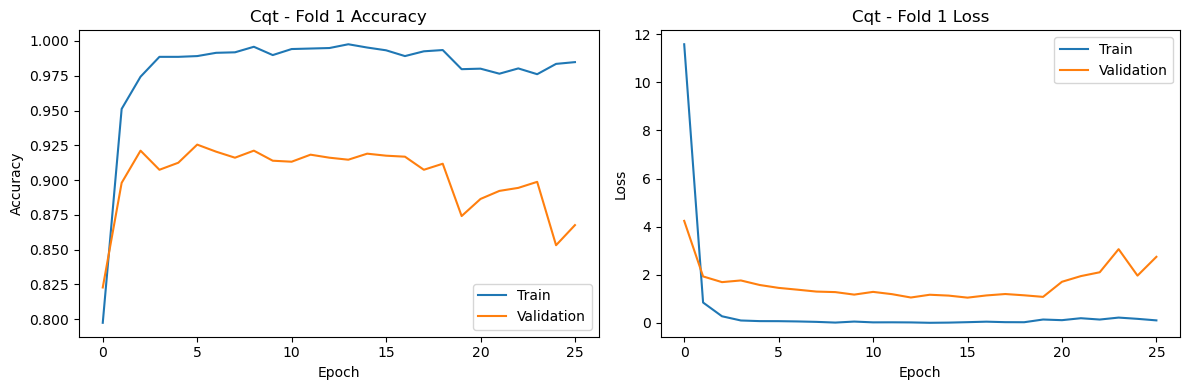

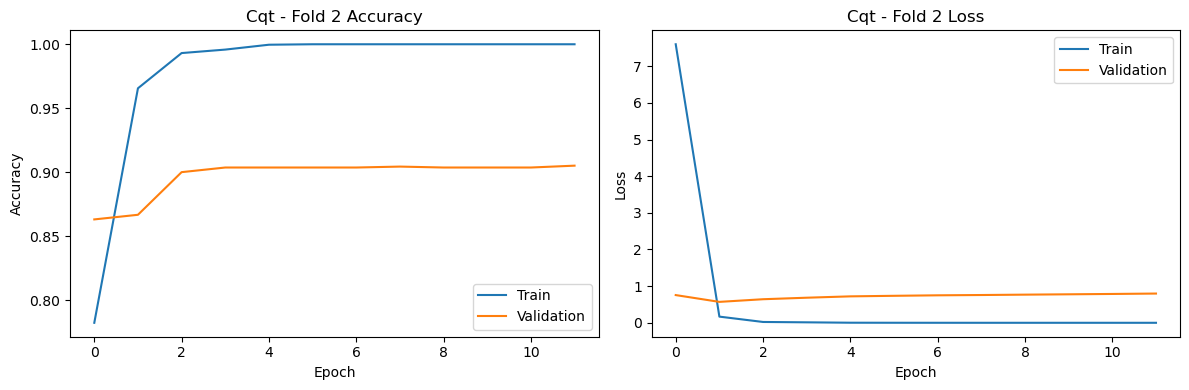

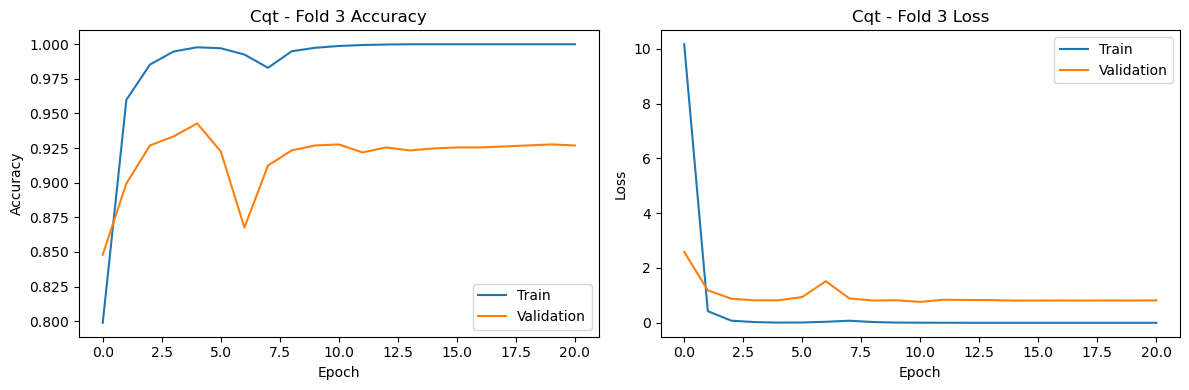

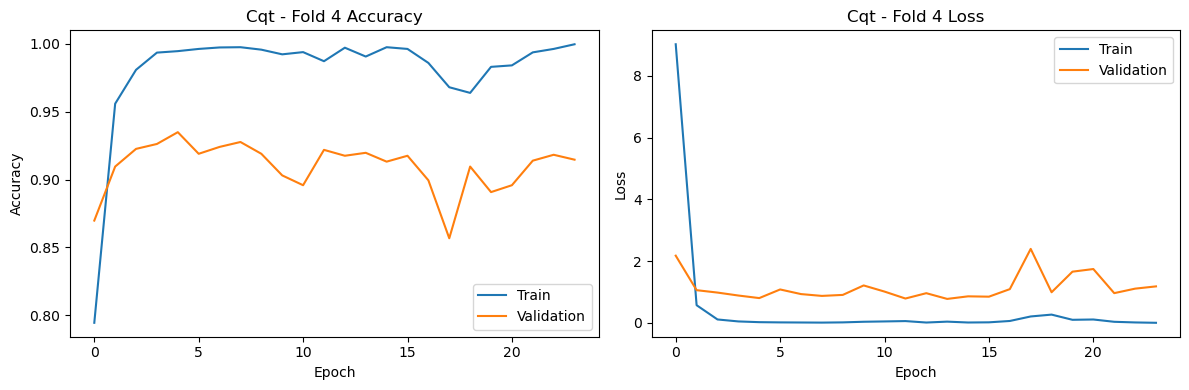

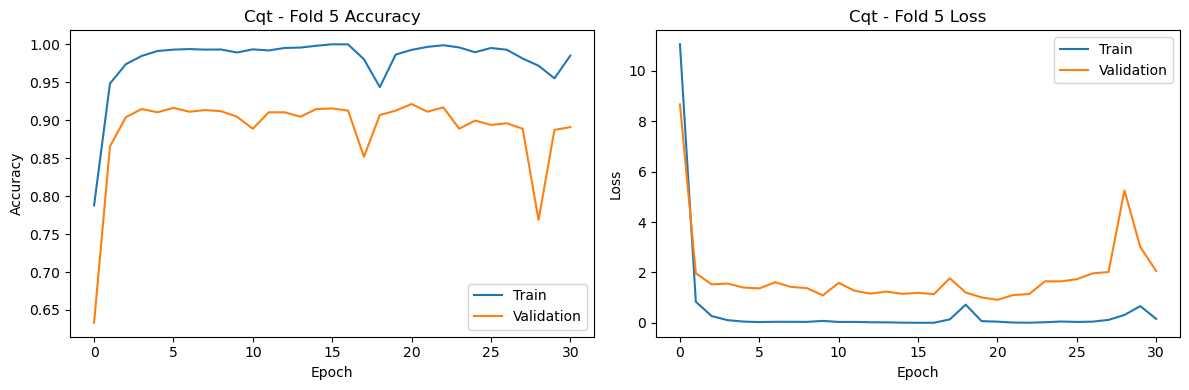


Stft Training History


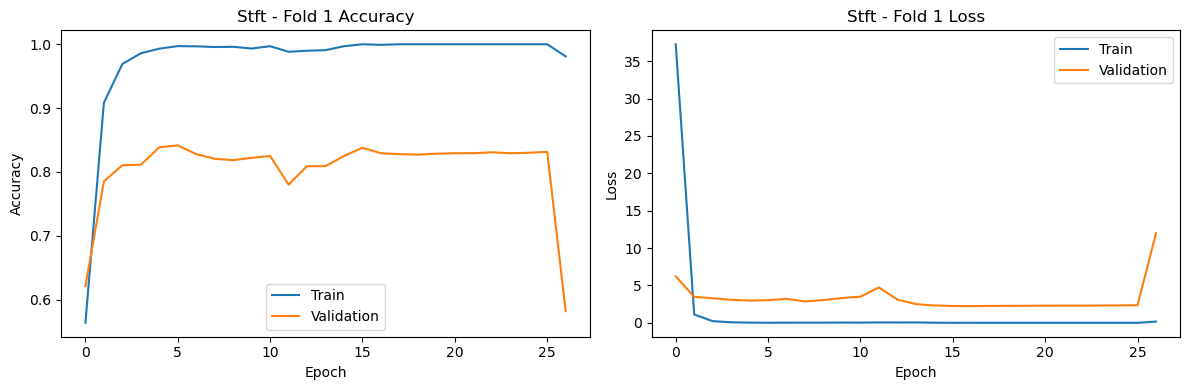

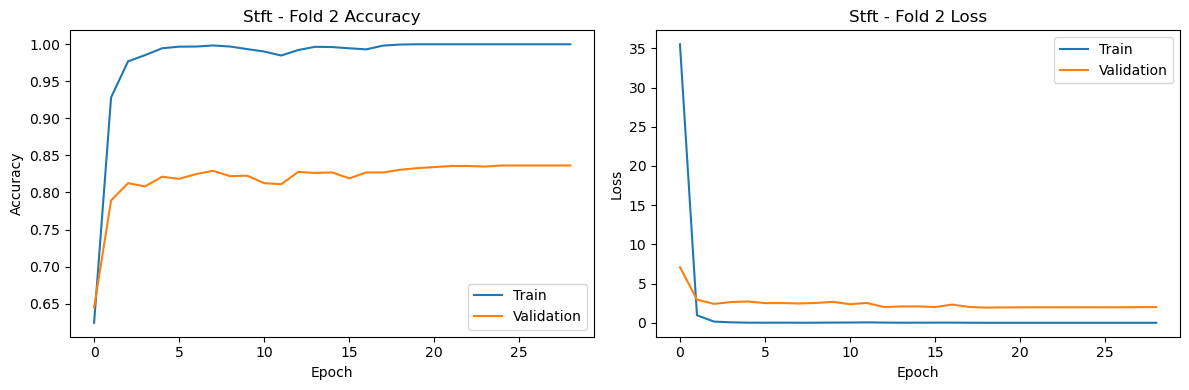

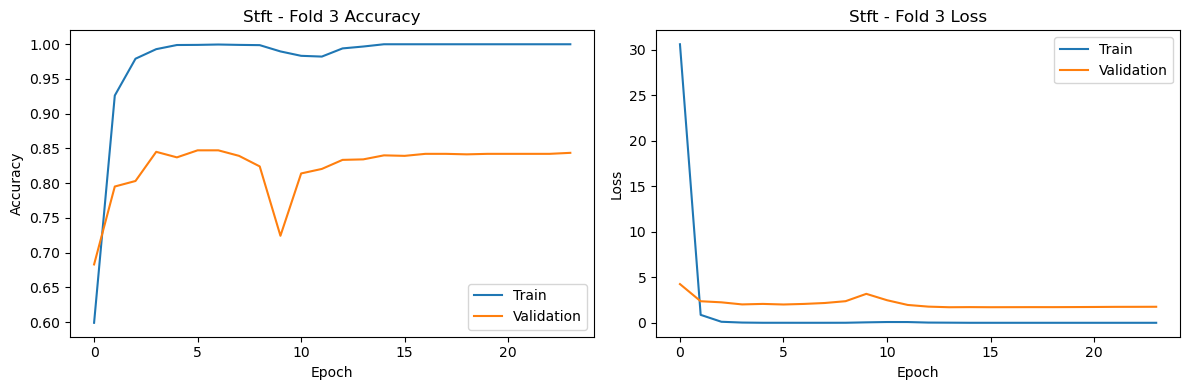

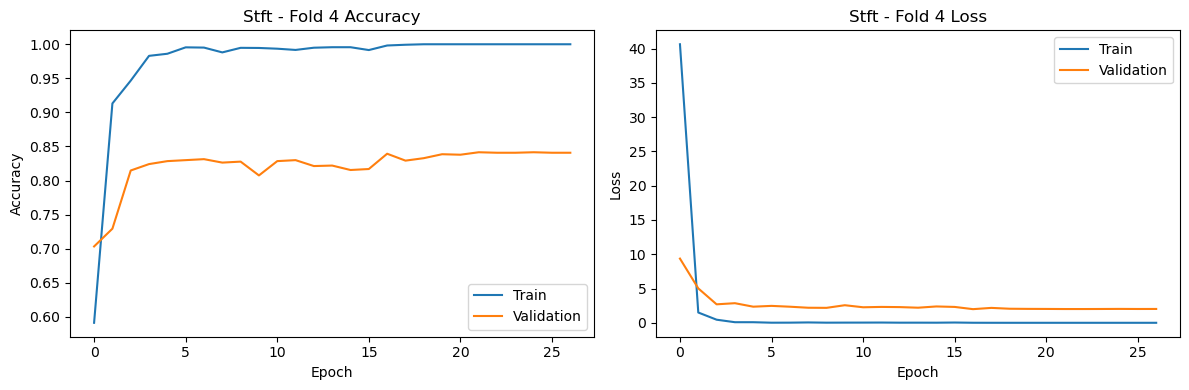

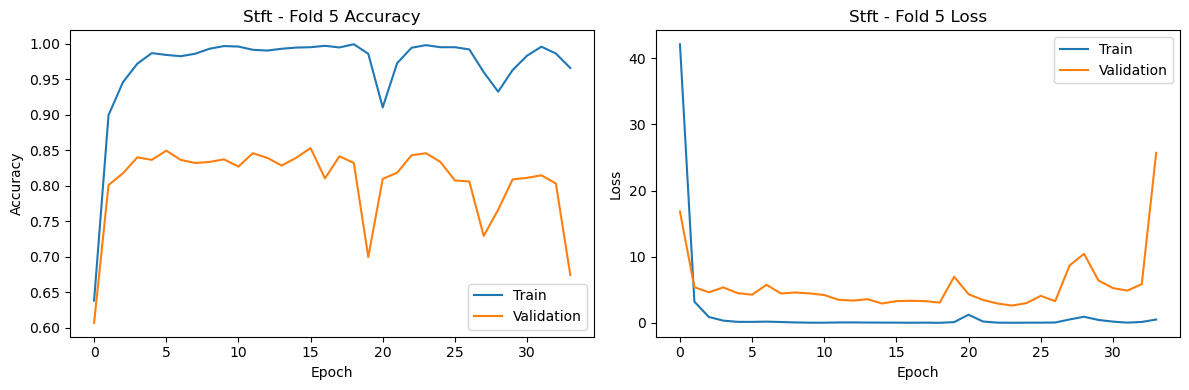


Harmonic Percussive Training History


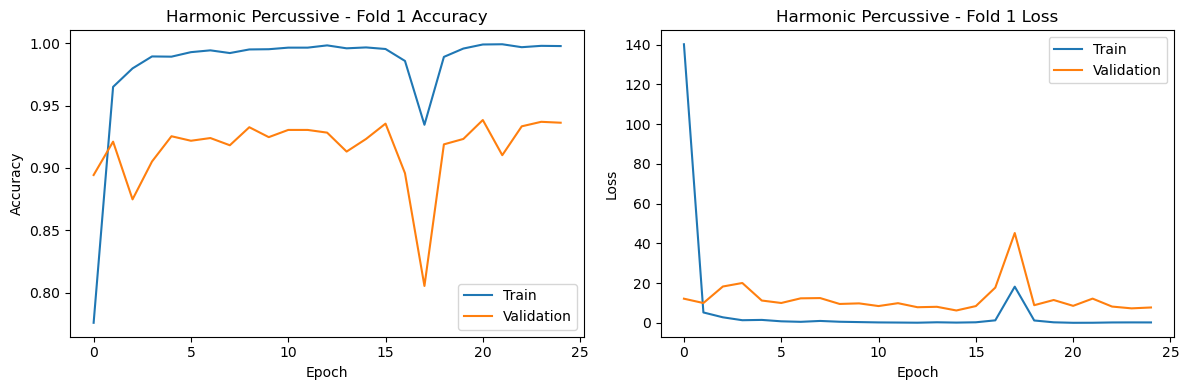

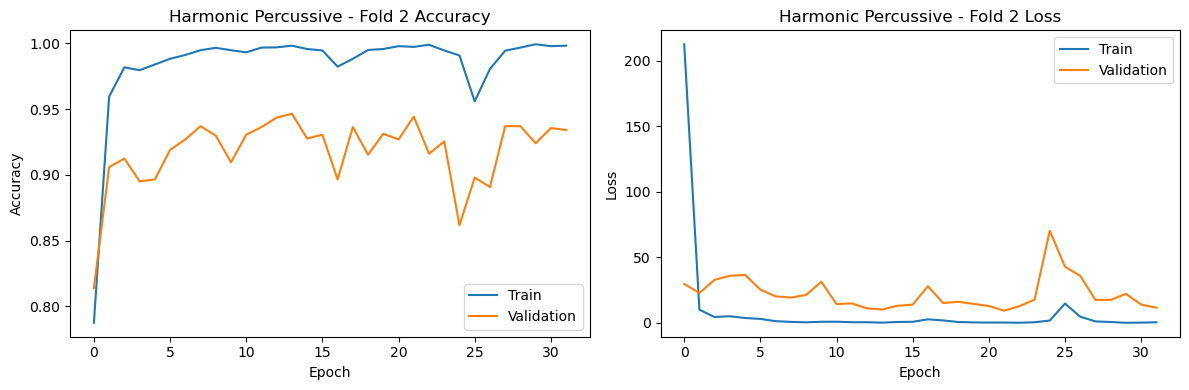

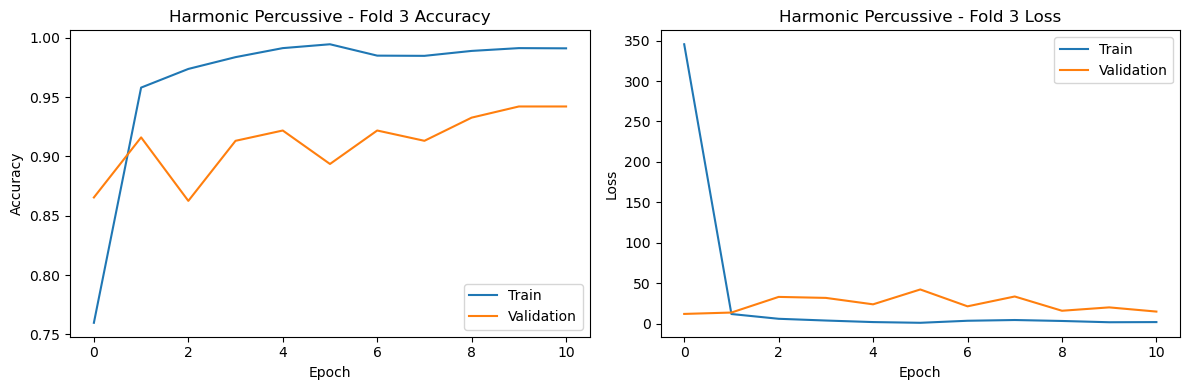

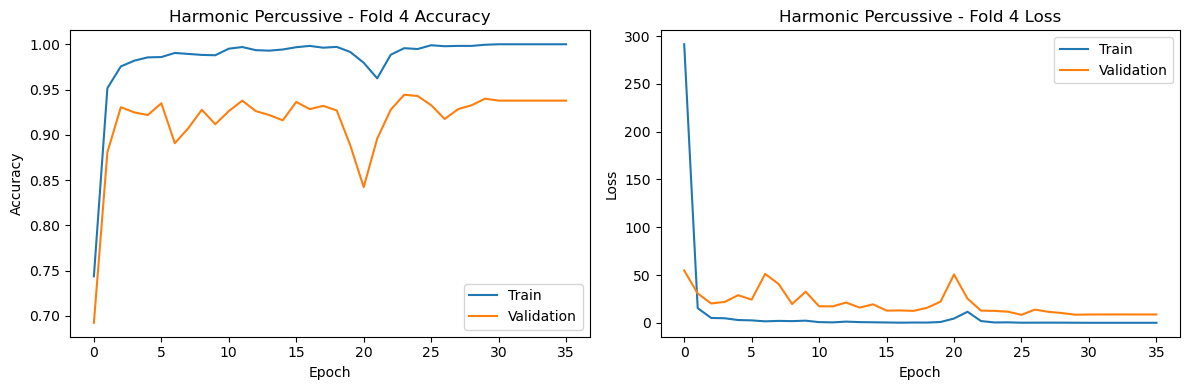

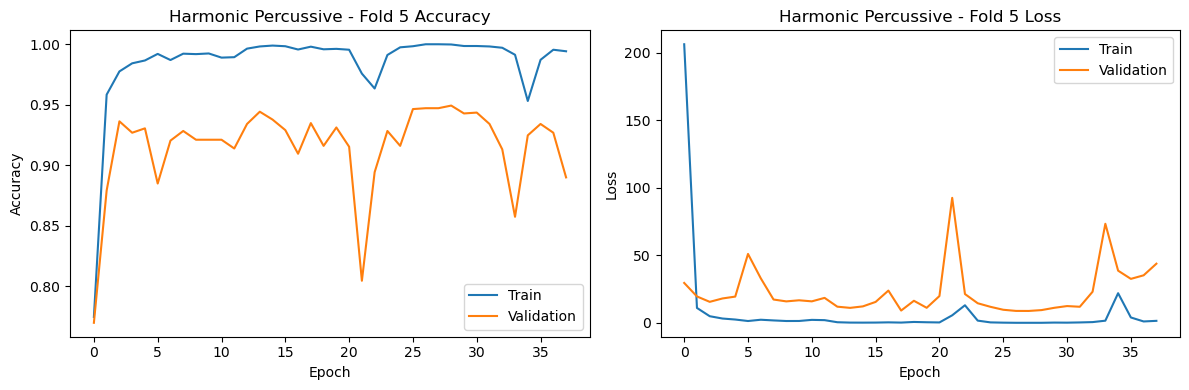


Onset Strength Training History


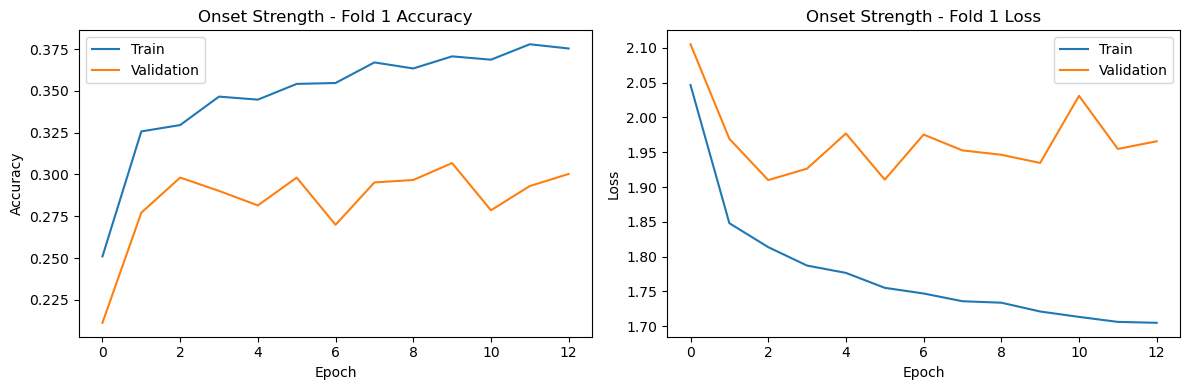

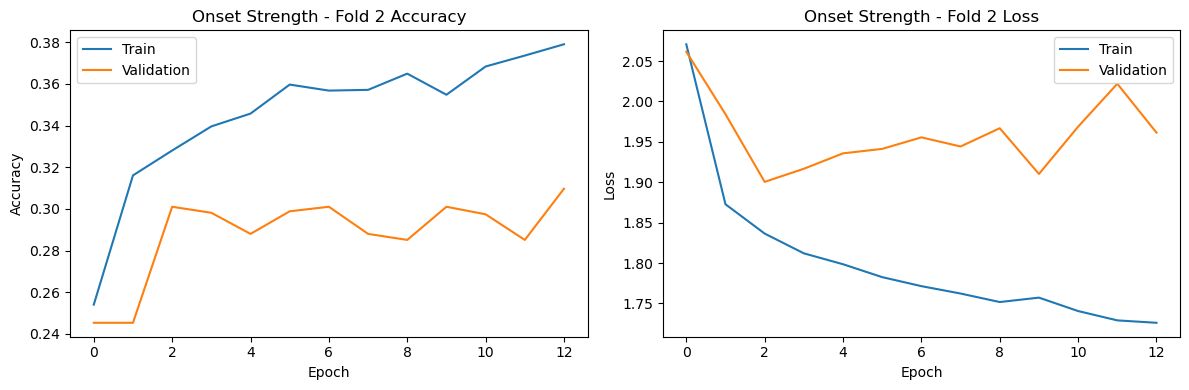

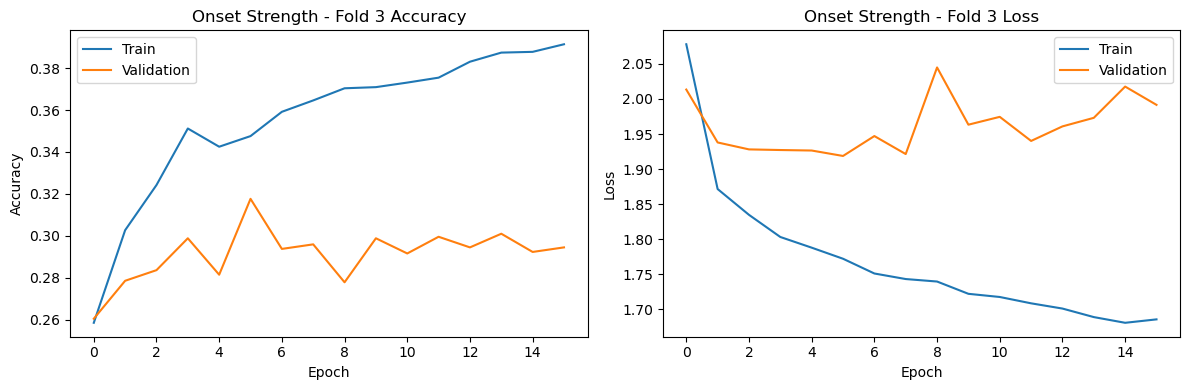

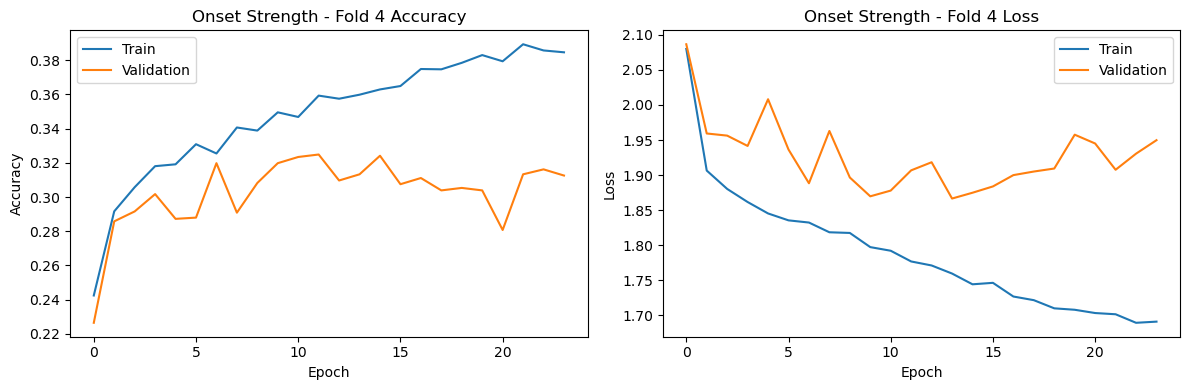

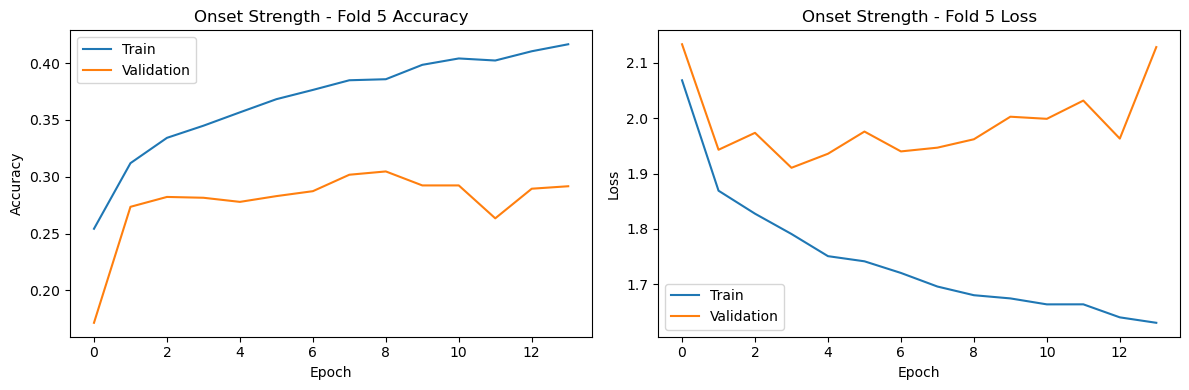

In [11]:
# Plot training/validation accuracy and loss for each model and fold
for feature_type, results in individual_results.items():
    histories = results.get('histories', [])
    if not histories:
        continue
    print(f"\n{'='*40}\n{feature_type.replace('_', ' ').title()} Training History\n{'='*40}")
    for fold, history in enumerate(histories):
        plt.figure(figsize=(12, 4))
        # Accuracy
        plt.subplot(1, 2, 1)
        plt.plot(history.get("accuracy", []), label="Train")
        plt.plot(history.get("val_accuracy", []), label="Validation")
        plt.title(f"{feature_type.replace('_', ' ').title()} - Fold {fold+1} Accuracy")
        plt.xlabel("Epoch")
        plt.ylabel("Accuracy")
        plt.legend()
        # Loss
        plt.subplot(1, 2, 2)
        plt.plot(history.get("loss", []), label="Train")
        plt.plot(history.get("val_loss", []), label="Validation")
        plt.title(f"{feature_type.replace('_', ' ').title()} - Fold {fold+1} Loss")
        plt.xlabel("Epoch")
        plt.ylabel("Loss")
        plt.legend()
        plt.tight_layout()
        plt.show()

In [12]:
# Get best individual model by mean accuracy
best_model = performance_df.iloc[0]['Feature Type'].replace(' ', '_').lower()
ensemble_acc = np.array(ensemble_results['accuracy_list'])
individual_acc = np.array(individual_results[best_model]['accuracy_list'])

t_stat, p_val = ttest_rel(ensemble_acc, individual_acc)
print(f"Paired t-test p-value (ensemble vs best individual): {p_val:.4e}")
if p_val < 0.05:
    print("Difference is statistically significant (p < 0.05)")
else:
    print("Difference is NOT statistically significant (p >= 0.05)")

Paired t-test p-value (ensemble vs best individual): 2.6338e-04
Difference is statistically significant (p < 0.05)


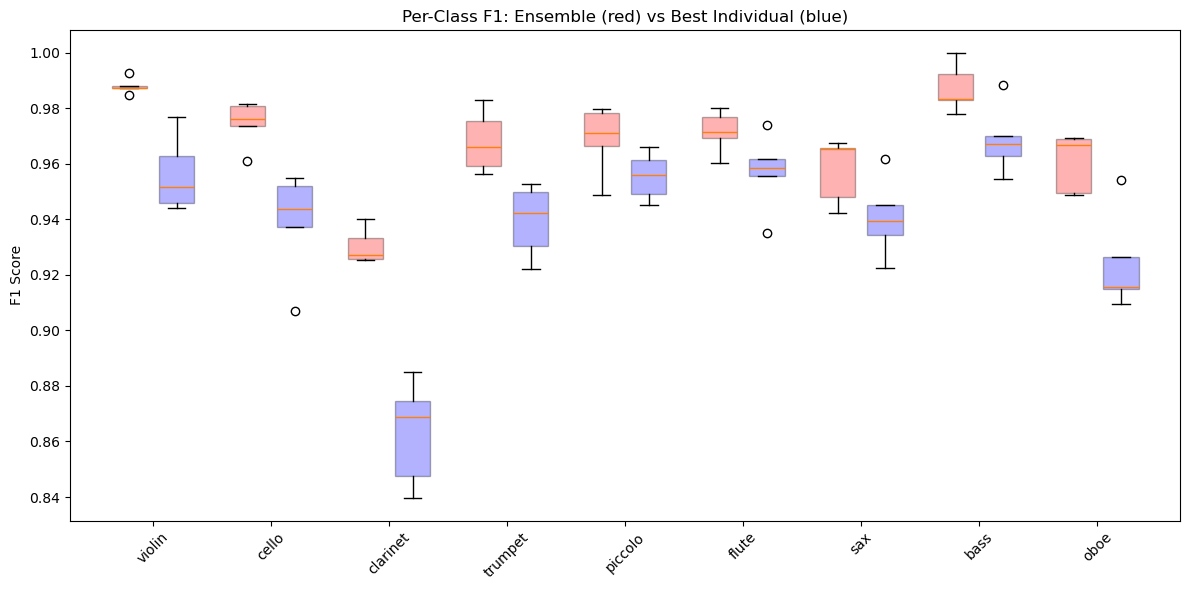

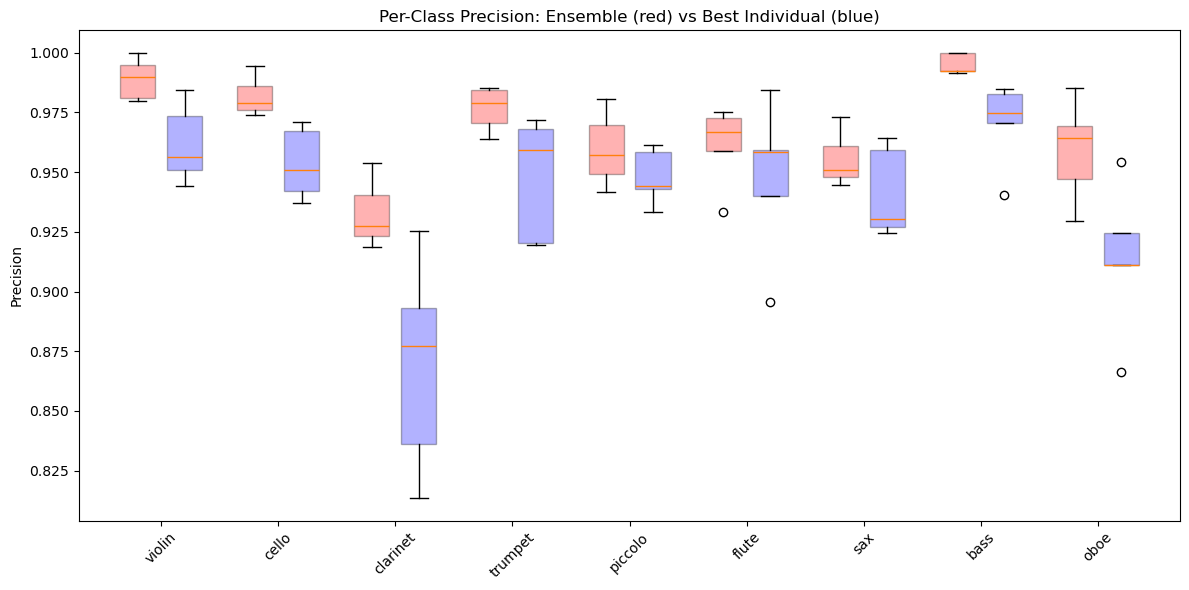

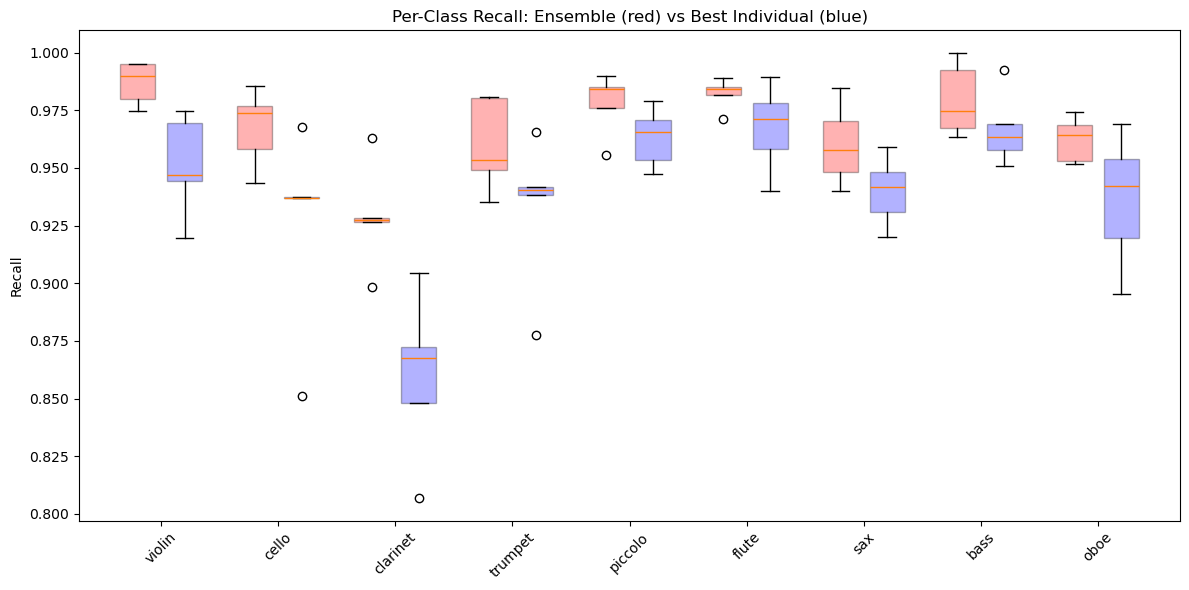

In [13]:
# Compare per-class F1, Precision, Recall between ensemble and best individual model
best_model = performance_df.iloc[0]['Feature Type'].replace(' ', '_').lower()
ensemble_f1, individual_f1 = [], []
ensemble_prec, individual_prec = [], []
ensemble_rec, individual_rec = [], []

class_labels = [str(i) for i in range(len(class_names))]

for fold in range(len(ensemble_results['classification_reports'])):
    e_report = ensemble_results['classification_reports'][fold]
    i_report = individual_results[best_model]['classification_reports'][fold]
    ensemble_f1.append([e_report[c]['f1-score'] for c in class_labels])
    individual_f1.append([i_report[c]['f1-score'] for c in class_labels])
    ensemble_prec.append([e_report[c]['precision'] for c in class_labels])
    individual_prec.append([i_report[c]['precision'] for c in class_labels])
    ensemble_rec.append([e_report[c]['recall'] for c in class_labels])
    individual_rec.append([i_report[c]['recall'] for c in class_labels])

ensemble_f1 = np.array(ensemble_f1)
individual_f1 = np.array(individual_f1)
ensemble_prec = np.array(ensemble_prec)
individual_prec = np.array(individual_prec)
ensemble_rec = np.array(ensemble_rec)
individual_rec = np.array(individual_rec)

plt.figure(figsize=(12, 6))
plt.boxplot([ensemble_f1[:,i] for i in range(len(class_names))], positions=np.arange(len(class_names))-0.2, widths=0.3, patch_artist=True, boxprops=dict(facecolor='red', alpha=0.3), labels=class_names)
plt.boxplot([individual_f1[:,i] for i in range(len(class_names))], positions=np.arange(len(class_names))+0.2, widths=0.3, patch_artist=True, boxprops=dict(facecolor='blue', alpha=0.3))
plt.xticks(np.arange(len(class_names)), class_names, rotation=45)
plt.ylabel('F1 Score')
plt.title('Per-Class F1: Ensemble (red) vs Best Individual (blue)')
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))
plt.boxplot([ensemble_prec[:,i] for i in range(len(class_names))], positions=np.arange(len(class_names))-0.2, widths=0.3, patch_artist=True, boxprops=dict(facecolor='red', alpha=0.3), labels=class_names)
plt.boxplot([individual_prec[:,i] for i in range(len(class_names))], positions=np.arange(len(class_names))+0.2, widths=0.3, patch_artist=True, boxprops=dict(facecolor='blue', alpha=0.3))
plt.xticks(np.arange(len(class_names)), class_names, rotation=45)
plt.ylabel('Precision')
plt.title('Per-Class Precision: Ensemble (red) vs Best Individual (blue)')
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))
plt.boxplot([ensemble_rec[:,i] for i in range(len(class_names))], positions=np.arange(len(class_names))-0.2, widths=0.3, patch_artist=True, boxprops=dict(facecolor='red', alpha=0.3), labels=class_names)
plt.boxplot([individual_rec[:,i] for i in range(len(class_names))], positions=np.arange(len(class_names))+0.2, widths=0.3, patch_artist=True, boxprops=dict(facecolor='blue', alpha=0.3))
plt.xticks(np.arange(len(class_names)), class_names, rotation=45)
plt.ylabel('Recall')
plt.title('Per-Class Recall: Ensemble (red) vs Best Individual (blue)')
plt.tight_layout()
plt.show()

In [14]:
# Show top-3 most confused class pairs for ensemble and best individual (by sum of off-diagonal confusion)
def top_confusions(conf_matrices, class_names, top_n=3):
    total_conf = np.sum(np.array(conf_matrices), axis=0)
    np.fill_diagonal(total_conf, 0)
    flat = total_conf.flatten()
    top_idx = flat.argsort()[-top_n:][::-1]
    for idx in top_idx:
        i, j = divmod(idx, total_conf.shape[1])
        print(f"True: {class_names[i]}, Pred: {class_names[j]}, Count: {total_conf[i, j]}")

print("Top 3 most confused class pairs (Ensemble):")
top_confusions(ensemble_results['confusion_matrices'], class_names)

best_model = performance_df.iloc[0]['Feature Type'].replace(' ', '_').lower()
print("\nTop 3 most confused class pairs (Best Individual):")
top_confusions(individual_results[best_model]['confusion_matrices'], class_names)

Top 3 most confused class pairs (Ensemble):
True: oboe, Pred: clarinet, Count: 21
True: clarinet, Pred: oboe, Count: 17
True: clarinet, Pred: sax, Count: 16

Top 3 most confused class pairs (Best Individual):
True: clarinet, Pred: oboe, Count: 39
True: oboe, Pred: clarinet, Count: 35
True: trumpet, Pred: oboe, Count: 26


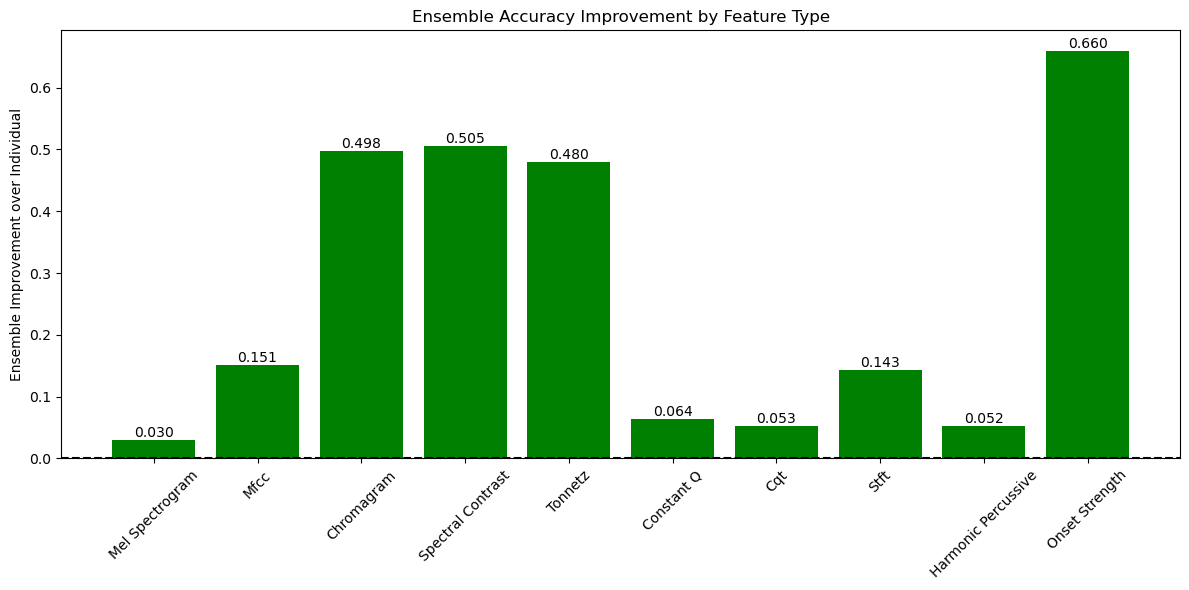

In [15]:
# Bar plot of (ensemble accuracy - individual accuracy) per feature type
improvements = []
for ft in FEATURE_TYPES:
    if ft in individual_results:
        individual_mean = np.mean(individual_results[ft]['accuracy_list'])
        improvement = np.mean(ensemble_results['accuracy_list']) - individual_mean
        improvements.append(improvement)
    else:
        improvements.append(np.nan)

plt.figure(figsize=(12, 6))
bars = plt.bar([ft.replace('_', ' ').title() for ft in FEATURE_TYPES], improvements, color=['green' if imp > 0 else 'red' for imp in improvements])
plt.axhline(0, color='black', linestyle='--')
plt.ylabel('Ensemble Improvement over Individual')
plt.title('Ensemble Accuracy Improvement by Feature Type')
plt.xticks(rotation=45)
for i, bar in enumerate(bars):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(), f"{improvements[i]:.3f}", ha='center', va='bottom' if improvements[i] > 0 else 'top')
plt.tight_layout()
plt.show()

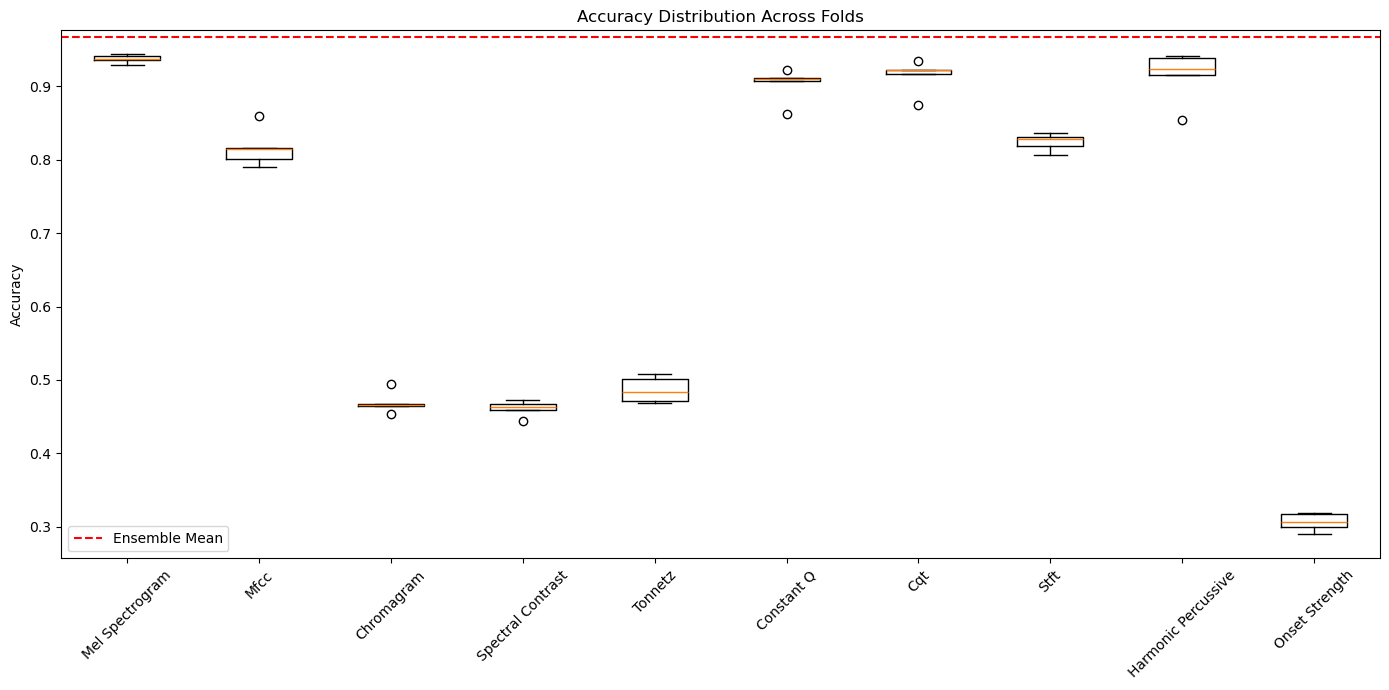

In [16]:
# Boxplot of accuracy distributions across folds for each model and the ensemble
data_for_box = [individual_results[ft]['accuracy_list'] for ft in FEATURE_TYPES if ft in individual_results]
labels = [ft.replace('_', ' ').title() for ft in FEATURE_TYPES if ft in individual_results]

plt.figure(figsize=(14, 7))
plt.boxplot(data_for_box, labels=labels)
plt.axhline(np.mean(ensemble_results['accuracy_list']), color='red', linestyle='--', label='Ensemble Mean')
plt.ylabel('Accuracy')
plt.title('Accuracy Distribution Across Folds')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [17]:
# Show the worst and best performing fold for each model and the ensemble
print("Worst and Best Fold Accuracies:")
for ft in FEATURE_TYPES:
    if ft in individual_results:
        accs = individual_results[ft]['accuracy_list']
        print(f"{ft.replace('_', ' ').title()}: Min={np.min(accs):.4f}, Max={np.max(accs):.4f}")
ensemble_accs = ensemble_results['accuracy_list']
print(f"Ensemble: Min={np.min(ensemble_accs):.4f}, Max={np.max(ensemble_accs):.4f}")

Worst and Best Fold Accuracies:
Mel Spectrogram: Min=0.9294, Max=0.9433
Mfcc: Min=0.7904, Max=0.8594
Chromagram: Min=0.4534, Max=0.4948
Spectral Contrast: Min=0.4447, Max=0.4722
Tonnetz: Min=0.4684, Max=0.5087
Constant Q: Min=0.8622, Max=0.9218
Cqt: Min=0.8738, Max=0.9340
Stft: Min=0.8056, Max=0.8367
Harmonic Percussive: Min=0.8541, Max=0.9409
Onset Strength: Min=0.2899, Max=0.3185
Ensemble: Min=0.9577, Max=0.9745
